# TP 2 : Signature Plot, Epps Effect and Link between Spread and Volatility per trade

## I. Volatility Estimator and Signature Plot

### 1. Signature Plot

Let $P$ be the price process, $X=\log P$ be the log-price process and $\Delta$ the discretization step over a time period $[0,T]$. Set for every $j\in{1,\ldots,T/\Delta}$, $r_{\Delta}(j)=X_{\Delta j}-X_{\Delta(j-1)}$ the log-price increments. Thus, in the Itô semi-martingale framework, the integrated variance reads
$$\int_0^T\sigma^2_sds=\lim_{\Delta\to0}\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2.$$
Consequently, a "natural" estimator for the integrated variance is
$$\hat{V}_R(\Delta)=\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2.$$
This estimator is consistent since
$$\hat{V}_R(\Delta)\overset{\mathbb{P}}{\underset{\Delta\to0}{\longrightarrow}}\int_0^T\sigma^2_sds.$$

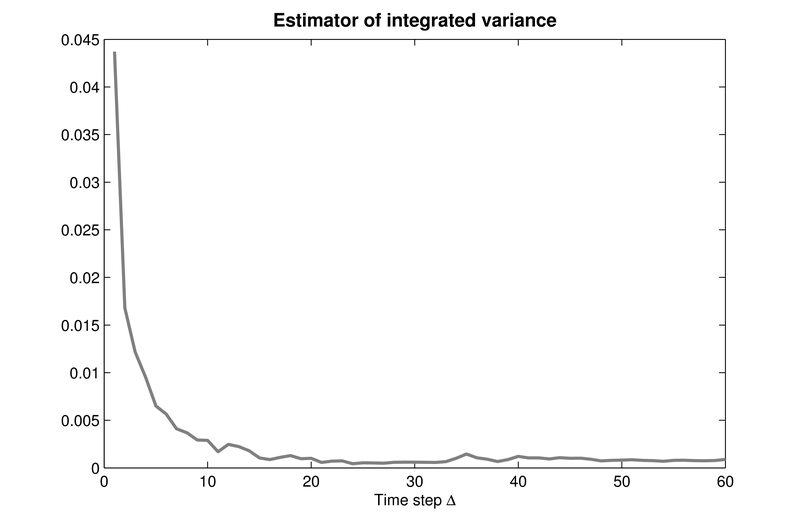

In [ ]:
from IPython.display import Image
Image(filename='SignaturePlot.png', width=500)

_Estimator for the integrated variance computed for Rio Tinto between 03/01/2012 and 19/06/2012 according to the time discretization step._

They are many other ways to estimate the volatility: for example by using the minimum and the maximum of the price (see Garman & Klass), by considering multi-scale (see Ait-Sahalia or Ait-Sahalia & Jacod}) or by bid-ask modeling (see Robert & Rosenbaum).

**Observations and microstructure.** A model for log-price observation $X$ may be $X=M+\varepsilon$, where $M$ is a semi-martingale and $\varepsilon$ is the noise. Consequently
$$r_{\Delta}(j)=M_{\Delta j}-M_{\Delta(j-1)}+\varepsilon_{\Delta j}-\varepsilon_{\Delta(j-1)}=r^M_{\Delta}(j)+\eta_{\Delta}(j).$$
Thus the realized varince reads
$$\hat{V}_R(\Delta)=\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2=\sum_{j=1}^{T/\Delta}r^M_{\Delta}(j)^2+\sum_{j=1}^{T/\Delta}\eta_{\Delta}(j)^2+\sum_{j=1}^{T/\Delta}r^M_{\Delta}(j)\eta_{\Delta}(j).$$
This estimator diverges when $\Delta\to0$.

<font color='blue'>**To do.** Plot $\hat{V}_R(\Delta)$ with respect to $\Delta$ (in minutes and seconds) for all the assets. Do it for the mid-prices and the log-mid-prices. Comment the results.</font>

In [ ]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

diction = {'Paris':['BOUYGUES','LVMH','SANOFI','TOTAL'],
           'Nasdaq':['AMAZON','APPLE','GOOGLE'],
           'Tokyo':['CANON','PANASONIC','SONY']}
Paris, Nasdaq, Tokyo = dict(), dict(), dict()

for name in diction.keys():
    if name == 'Paris':
        for firm in diction[name]:
            Paris[firm] = pd.read_hdf(f'Data/{firm}.h5')
    if name == 'Nasdaq':
        for firm in diction[name]:
            Nasdaq[firm] = pd.read_hdf(f'Data/{firm}.h5')
    if name == 'Tokyo':
        for firm in diction[name]:
            Tokyo[firm] = pd.read_hdf(f'Data/{firm}.h5')

DeltaS = list(range(20,12000,100))

In [ ]:
def signaturePlot(df_company, company):
    df_LVMH = df_company
    df_LVMH['MidPrice'] = (df_company['BidPrice'] + df_company['AskPrice'])/2
    df_LVMH['LogMidPrice'] = np.log(df_LVMH['MidPrice'])


    Vol = [(df_LVMH[['MidPrice','LogMidPrice']].resample(f'{i}s').first().diff()**(2)).sum() for i in DeltaS]
    MidPricePlot = [Vol[i].iloc[0] for i in range(len(Vol))]
    LogMidPricePlot = [Vol[i].iloc[1] for i in range(len(Vol))]

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Creating a figure with two subplots
    fig.suptitle(f'{company}')

    axes[0].plot(DeltaS,MidPricePlot)
    axes[0].set_xlabel('$\Delta$ in seconds')
    axes[0].set_ylabel('$V_R(\Delta)$')
    axes[0].set_title(f'MidPrice')

    axes[1].set_xlabel('$\Delta$ in seconds')
    axes[1].set_ylabel('$V_R(\Delta)$')
    axes[1].set_title(f'LogMidPrice')
    axes[1].plot(DeltaS,LogMidPricePlot)
    plt.show()

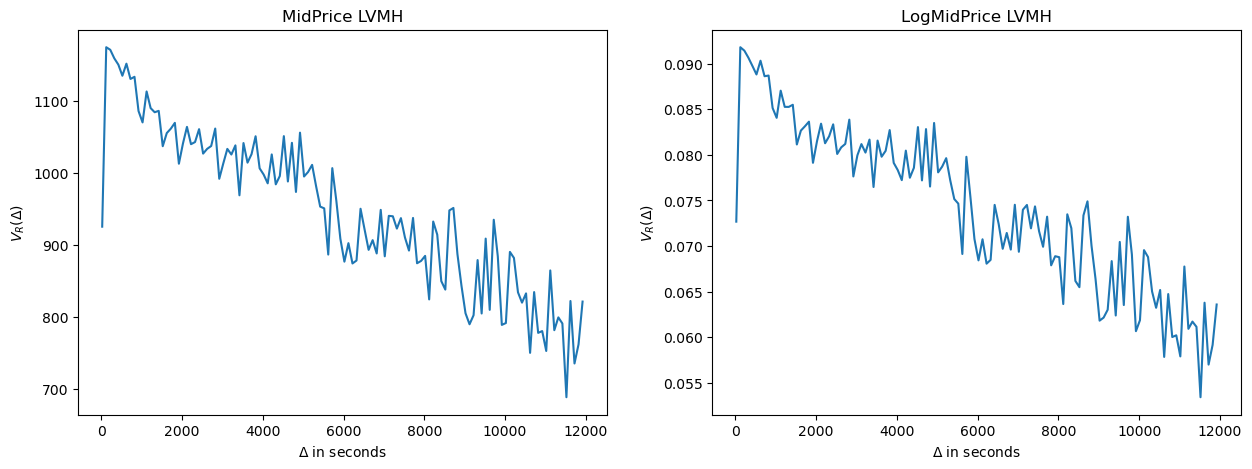

In [ ]:
signaturePlot(Paris['LVMH'], 'LVMH')

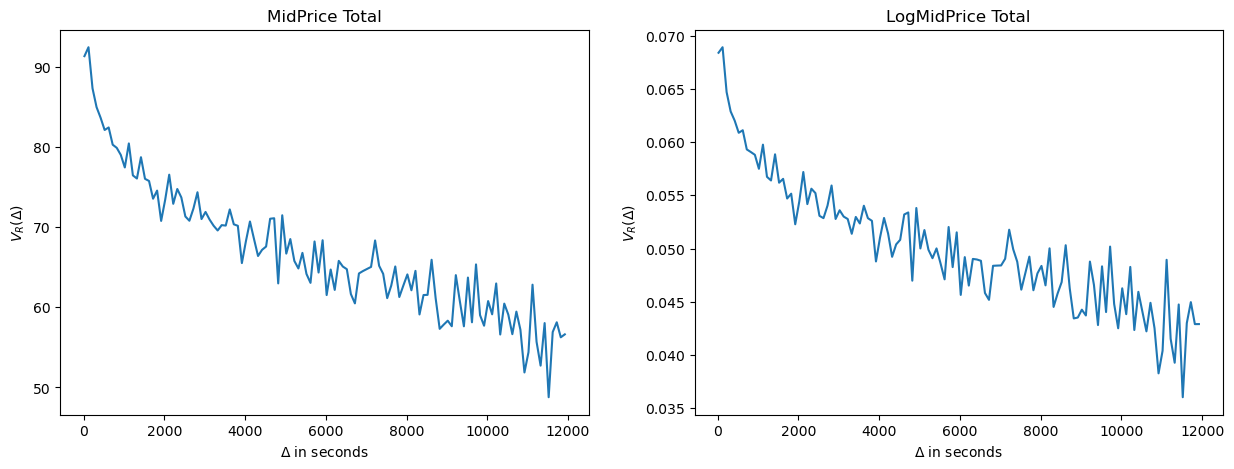

In [ ]:
signaturePlot(Paris['TOTAL'], 'Total')

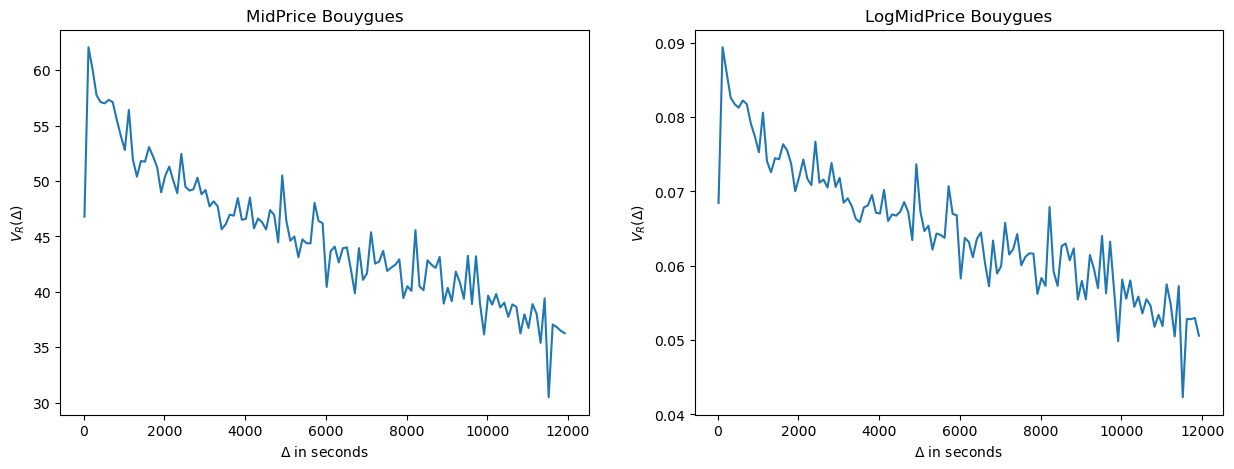

In [ ]:
signaturePlot(Paris['BOUYGUES'], 'Bouygues')

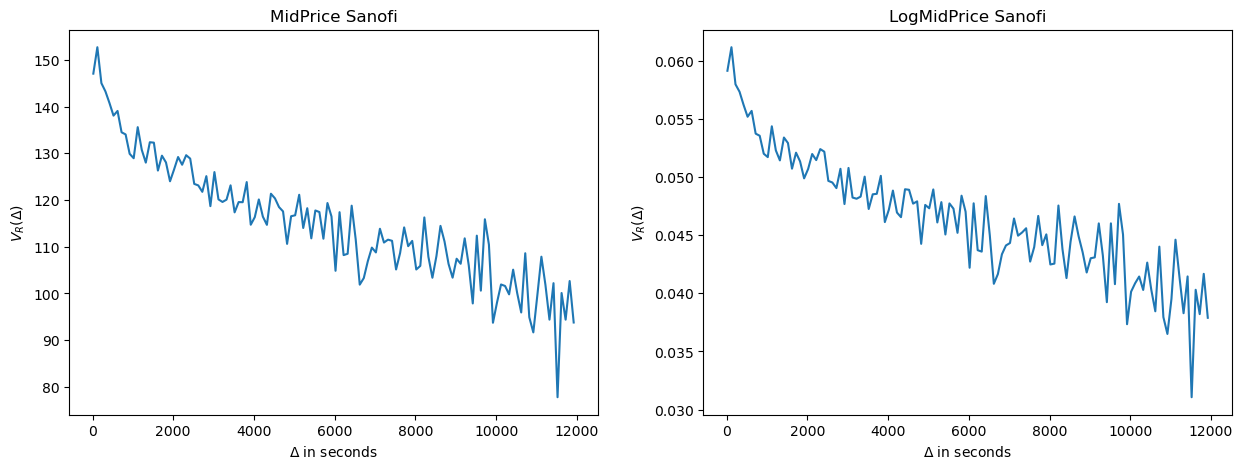

In [ ]:
signaturePlot(Paris['SANOFI'], 'Sanofi')

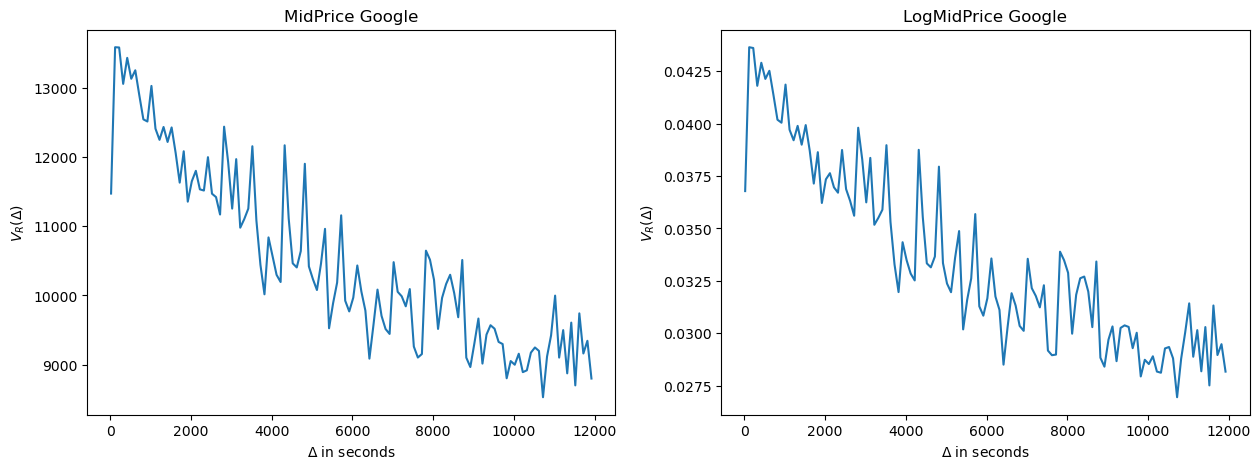

In [ ]:
signaturePlot(Nasdaq['GOOGLE'], 'Google')

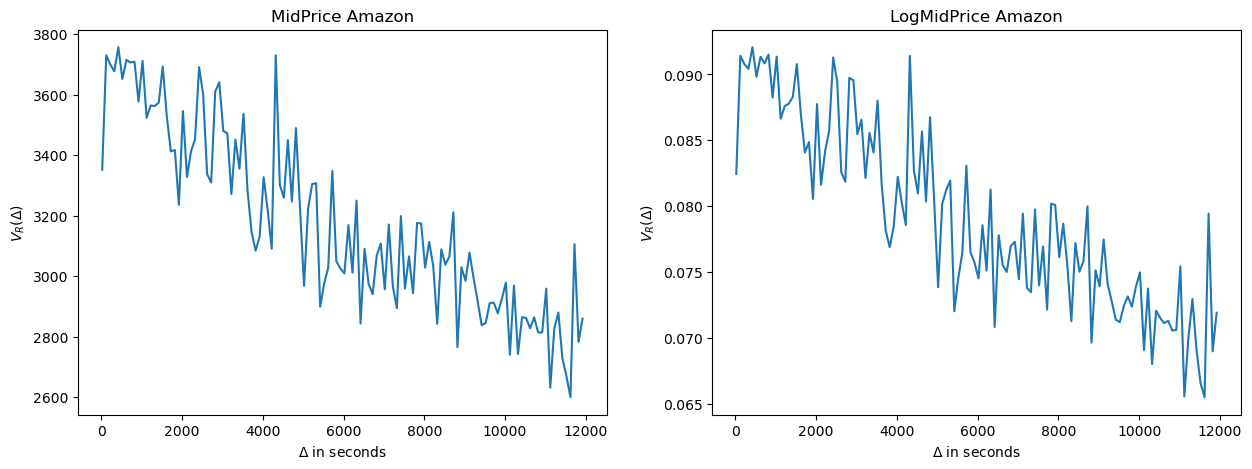

In [ ]:
signaturePlot(Nasdaq['AMAZON'], "Amazon")

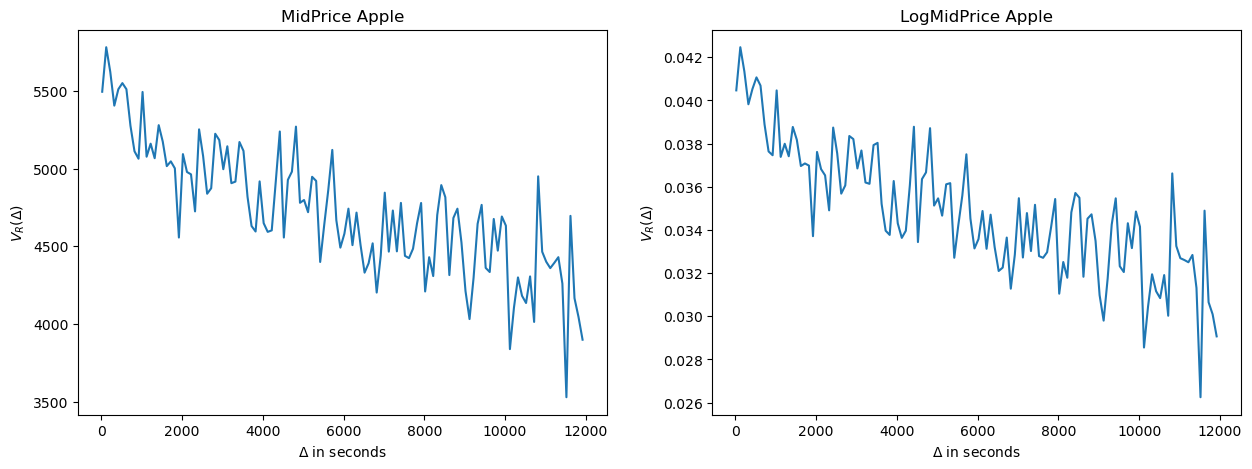

In [ ]:
signaturePlot(Nasdaq['APPLE'], "Apple")

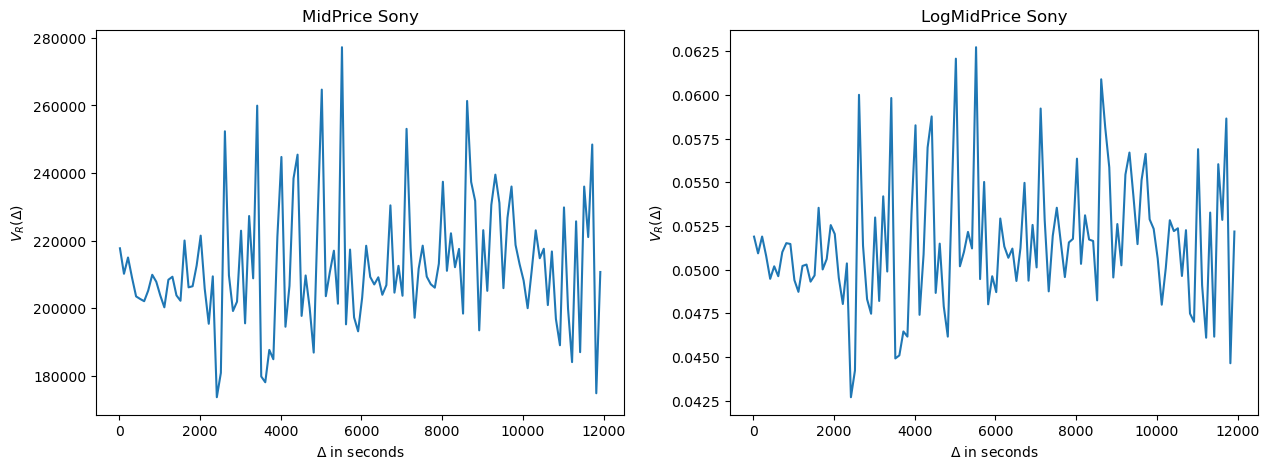

In [ ]:
signaturePlot(Tokyo["SONY"], "Sony")

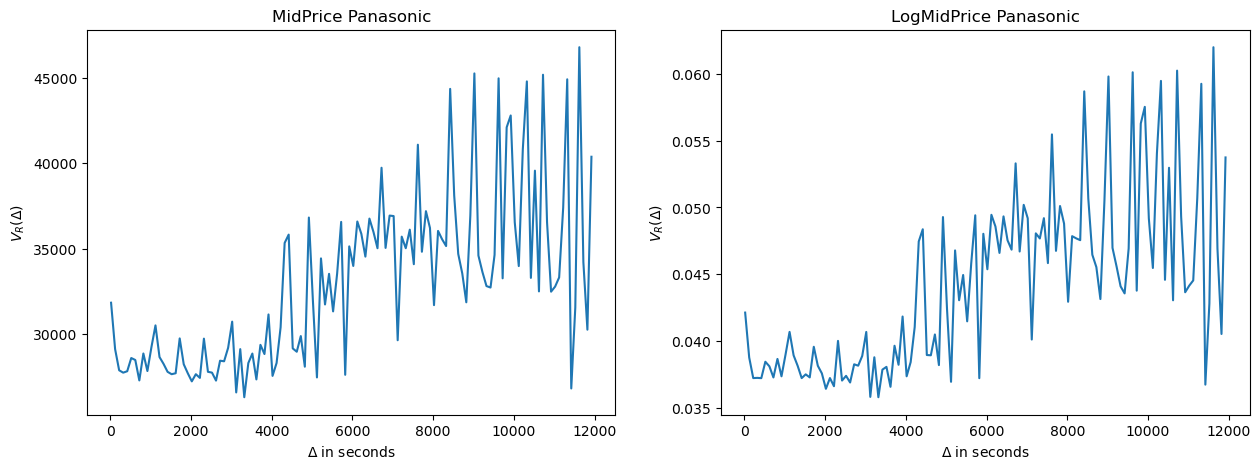

In [ ]:
signaturePlot(Tokyo["PANASONIC"], "Panasonic")

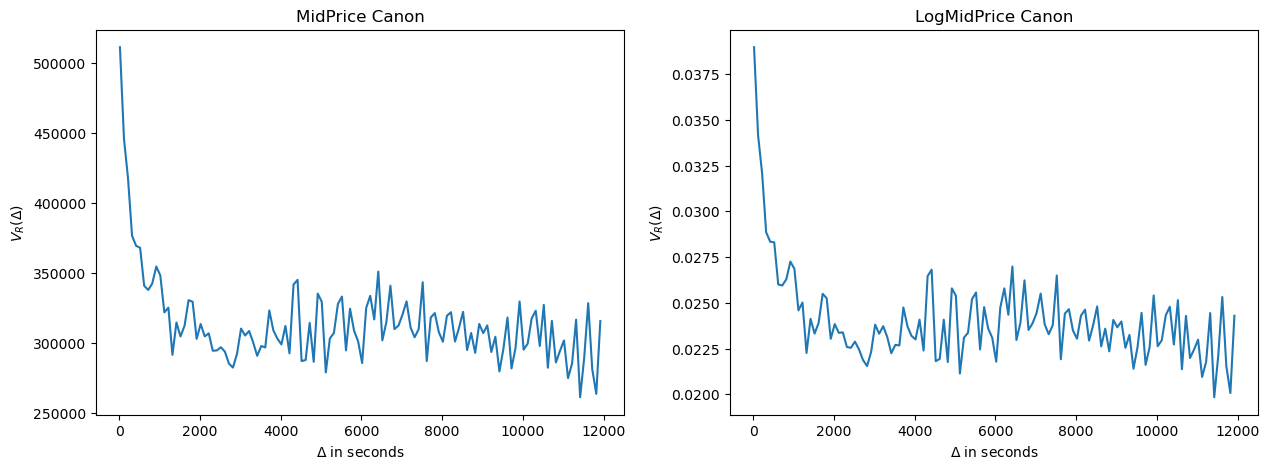

In [ ]:
signaturePlot(Tokyo["CANON"], "Canon")

**Commentary**
While some of those graphs do not explose when $\Delta$ goes to 0, like Panasonic and Sony that remains mostly stationary, most illustrates this phenomenom, the best exemple being Canon. However some companies like LVMH or Bouygues do have a graph that seems to decrease when $\Delta$ approches 0 : maybe the impact of the noise is less important for them...

### 2. Intraday Volatility Estimator of Garman and Klass

They consider consider intraday volatility estimators that are based upon the historical opening, closing, high, and low prices and transaction volume. Since high and low prices require continuous monitoring to obtain, they correspondingly contain superior information content, exploited herein.

Their model assumes that a diffusion process governs security prices
$$P_t = \Phi(X_t)$$
where $P$ is the security price, $t$ is time, $\Phi$ is a monotonic, time-independent transformation, and $X_t$ is a diffusion process with the differential representation
$$dX_t = \sigma dW_t$$
where $W_t$ is the standard Brownian motion and $\sigma$ is an unknown constant to be estimated.

**"Best" Analytic Scale-invariant Estimators**

They consider estimators depending on
- the opening price,
- the closing price,
- the high price
- the low price.

For the authors, an estimator is "best" when it has minimum variance and is unbiased. They also impose the requirements that the estimators be analytic with price and time symmetries and scale-invariant. Under regularity condition (analytic in a neighborhood of the
origin), they obtain that the estimator must be quadratic in its arguments. Owing scale invariance and analyticity, they reduce the problem and find the "best" estimator of this form (unbiased with minimum variance).

Finally, by eliminating the cross-product terms, the recommended and "more practical" estimator reads
$$\sigma_{GK}^2=\frac12\left(\mbox{High}-\mbox{Low}\right)^2-(2\ln2-1)\left(\mbox{Close}-\mbox{Open}\right)^2.$$

<font color='blue'>**To do.** 1. Compute the integrated variance with the Garman-Klass volatility estimator of both mid- and log-mid prices with respect to $\Delta$. Compare the results with the previous one.</font>

In [ ]:
def GKVolatility(df_company, company):

    df_LVMH = df_company
    df_LVMH['MidPrice'] = (df_company['BidPrice'] + df_company['AskPrice'])/2
    df_LVMH['LogMidPrice'] = np.log(df_LVMH['MidPrice'])

# Initialize empty lists for volatility estimators
    VolGK_MidPrice = []
    VolGK_LogMidPrice = []

    # Loop through different time intervals
    for d in DeltaS:
        # Resample data for MidPrice and LogMidPrice
        ohlc_MidPrice = df_LVMH['MidPrice'].resample(f'{d}s').ohlc().dropna()
        ohlc_LogMidPrice = df_LVMH['LogMidPrice'].resample(f'{d}s').ohlc().dropna()

        # Compute volatility estimators for MidPrice and LogMidPrice
        v1 = 0.5 * (ohlc_MidPrice['high'] - ohlc_MidPrice['low'])**2 - (2 * np.log(2) - 1) * (ohlc_MidPrice['close'] - ohlc_MidPrice['open'])**2
        v2 = 0.5 * (ohlc_LogMidPrice['high'] - ohlc_LogMidPrice['low'])**2 - (2 * np.log(2) - 1) * (ohlc_LogMidPrice['close'] - ohlc_LogMidPrice['open'])**2

        # Append square root of sum of squared differences to VolGK_MidPrice and VolGK_LogMidPrice
        VolGK_MidPrice.append(np.sqrt(v1.sum()))
        VolGK_LogMidPrice.append(np.sqrt(v2.sum()))

    # Plot Garman-Klass volatility estimator for MidPrice
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Creating a figure with two subplots
    fig.suptitle(company)

    axes[0].plot(DeltaS, VolGK_MidPrice)
    axes[0].set_xlabel('$\Delta$ in seconds')
    axes[0].set_ylabel('Garman-Klass volatility estimator')
    axes[0].set_title(f'MidPrice')

    # Plot Garman-Klass volatility estimator for LogMidPrice
    axes[1].plot(DeltaS, VolGK_LogMidPrice)
    axes[1].set_xlabel('$\Delta$ in seconds')
    axes[1].set_ylabel('Garman-Klass volatility estimator')
    axes[1].set_title(f'LogMidPrice')
    plt.show()

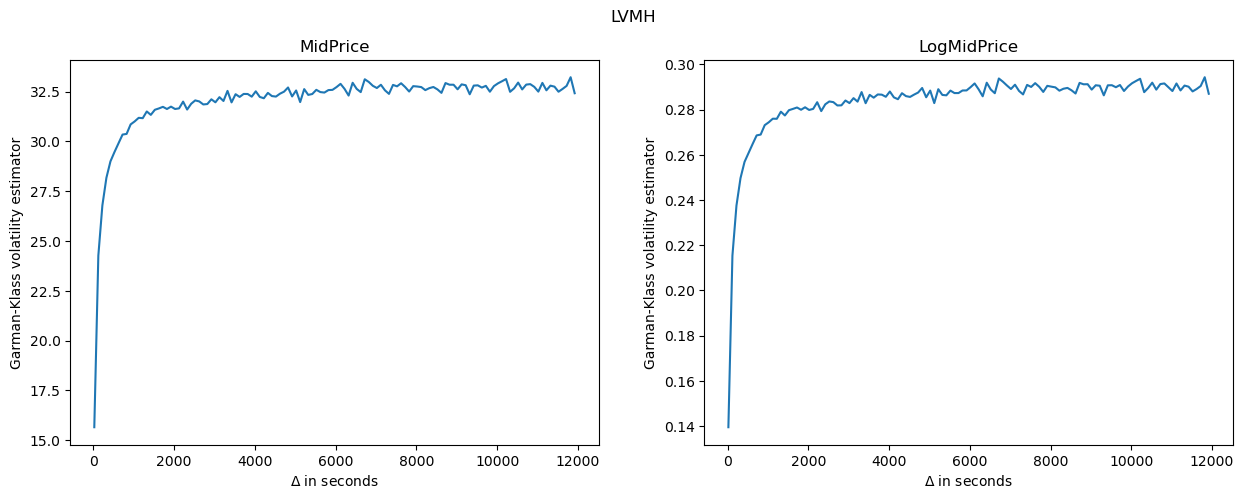

In [ ]:
GKVolatility(Paris['LVMH'], 'LVMH')

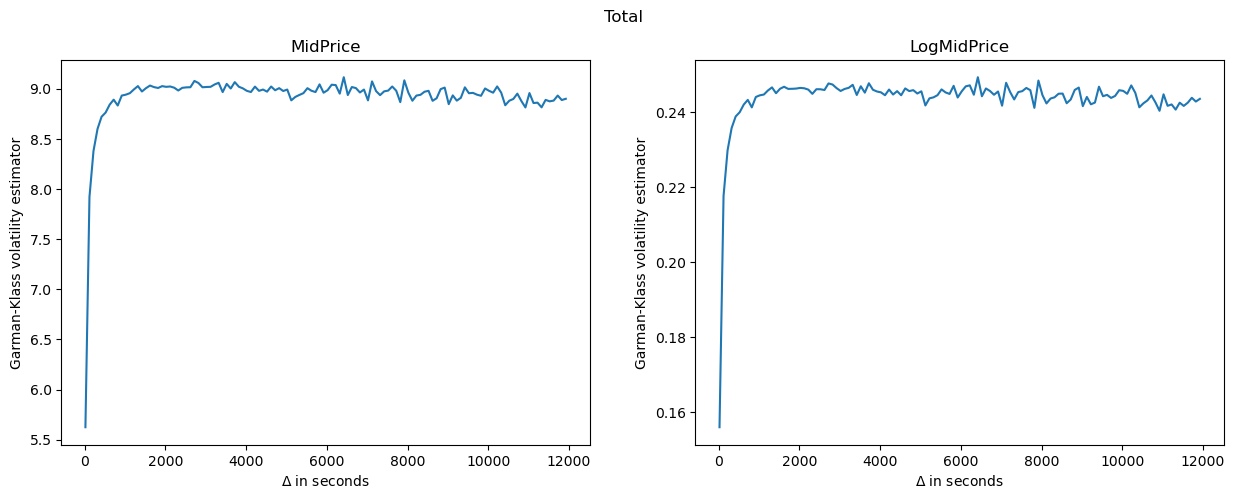

In [ ]:
GKVolatility(Paris['TOTAL'], 'Total')

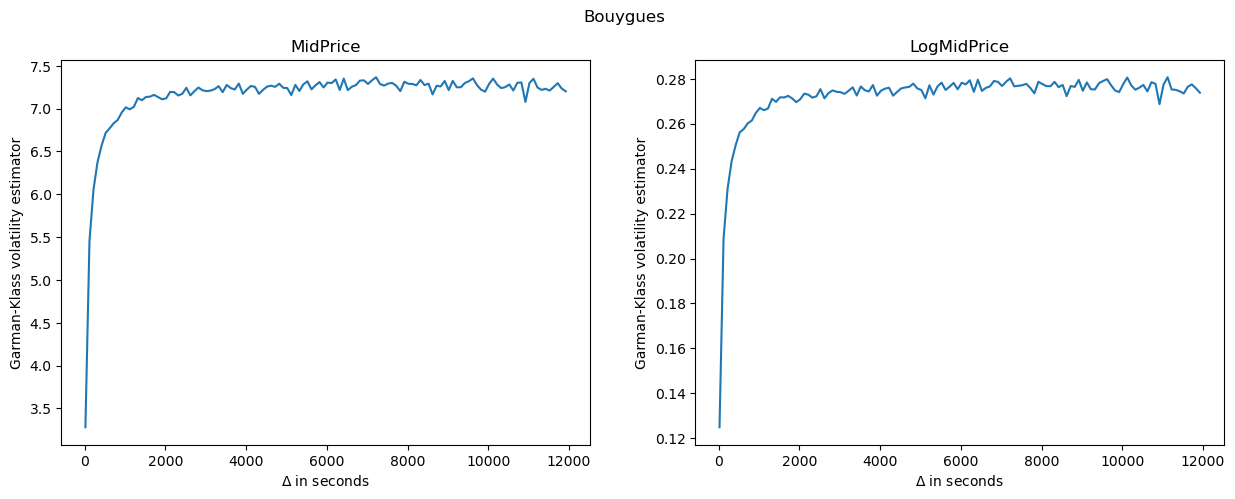

In [ ]:
GKVolatility(Paris['BOUYGUES'], 'Bouygues')

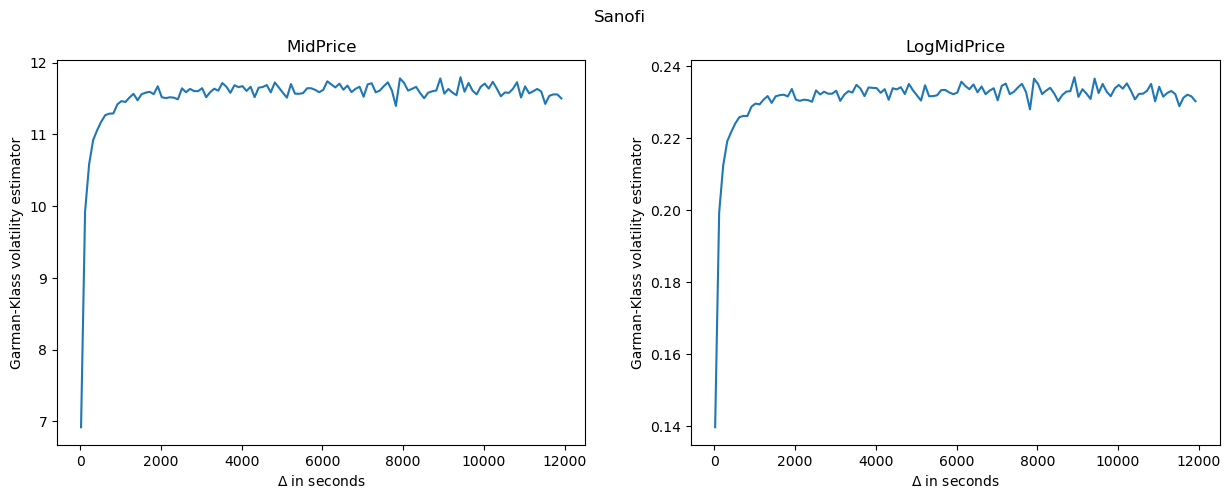

In [ ]:
GKVolatility(Paris['SANOFI'], 'Sanofi')

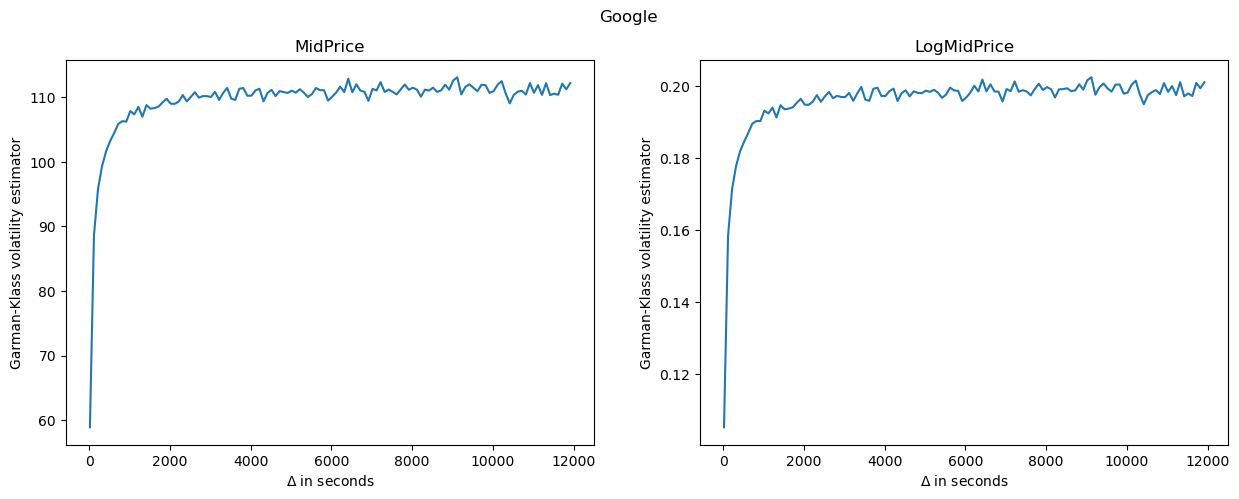

In [ ]:
GKVolatility(Nasdaq['GOOGLE'], 'Google')

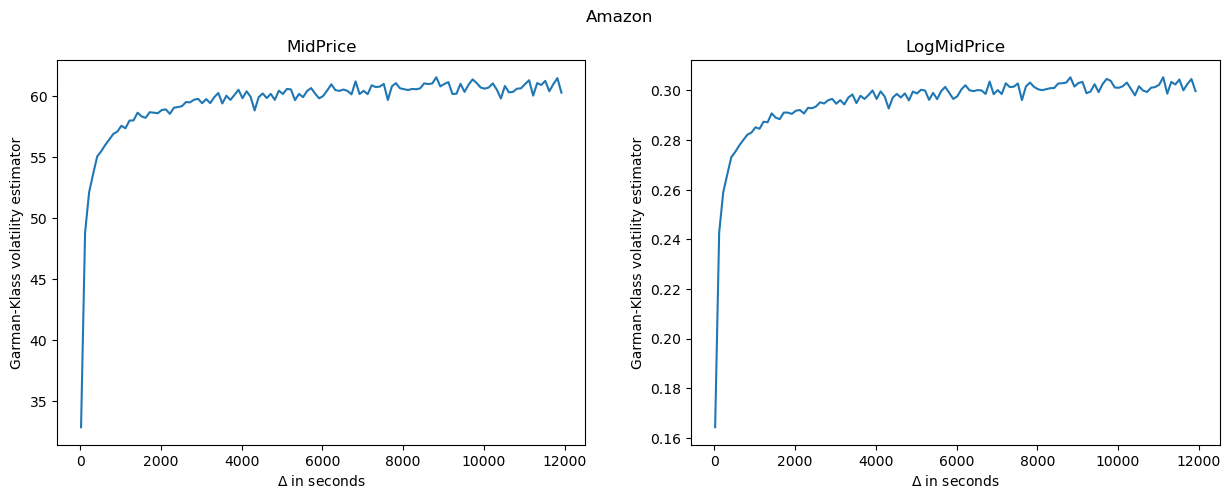

In [ ]:
GKVolatility(Nasdaq['AMAZON'], "Amazon")

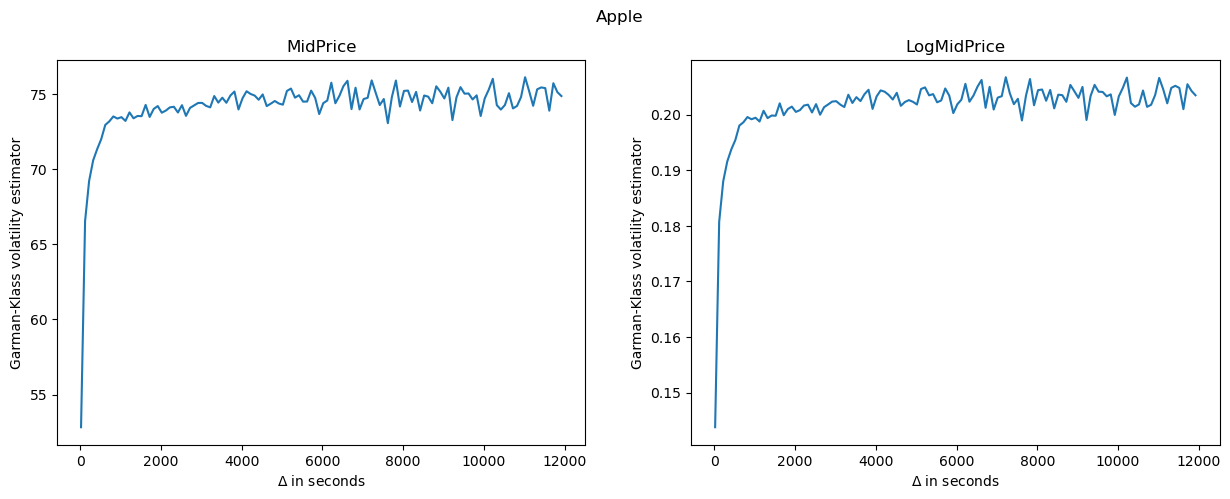

In [ ]:
GKVolatility(Nasdaq['APPLE'], "Apple")

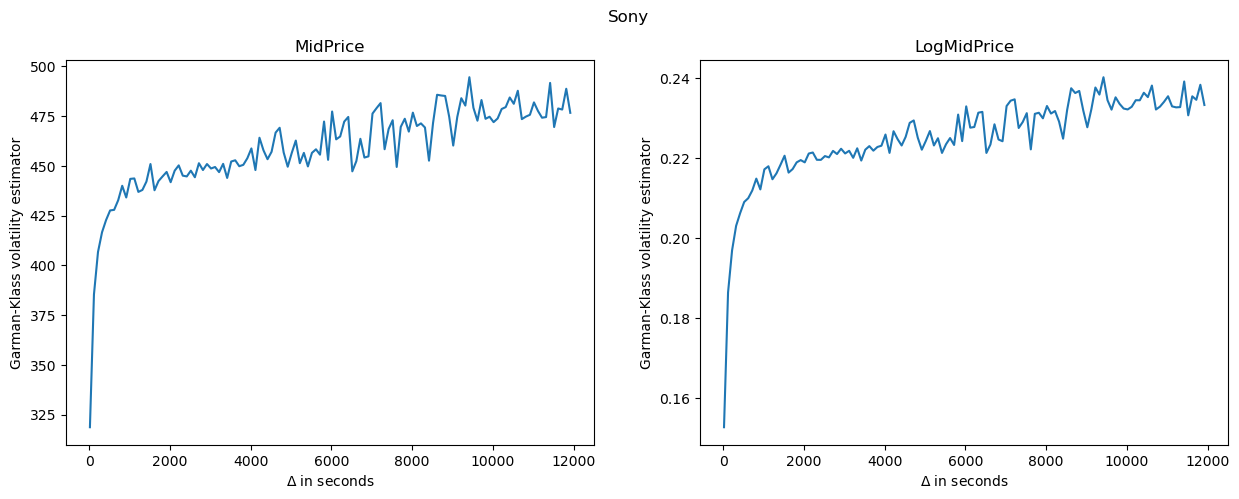

In [ ]:
GKVolatility(Tokyo["SONY"], "Sony")

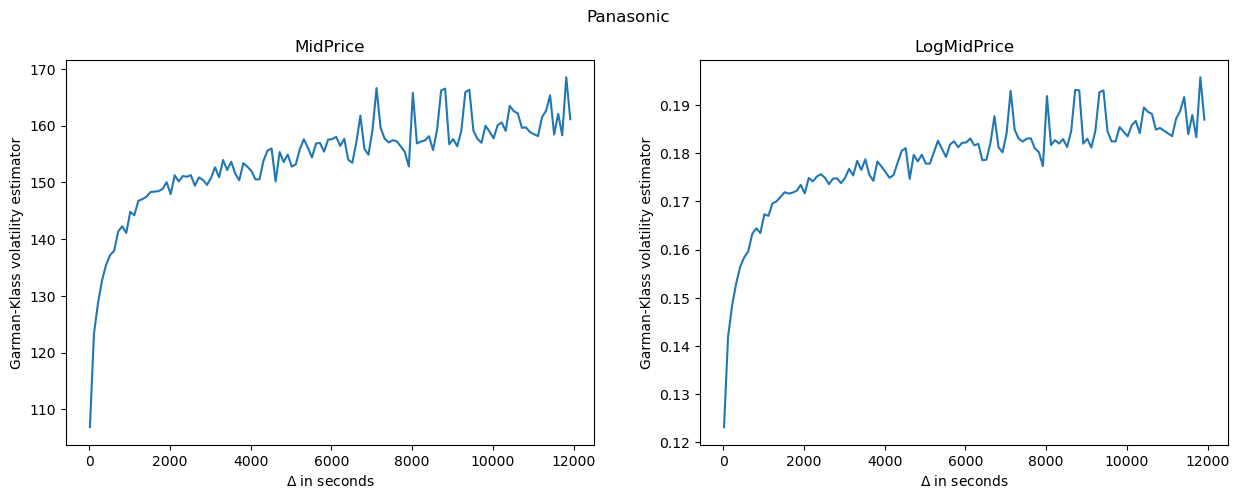

In [ ]:
GKVolatility(Tokyo["PANASONIC"], "Panasonic")

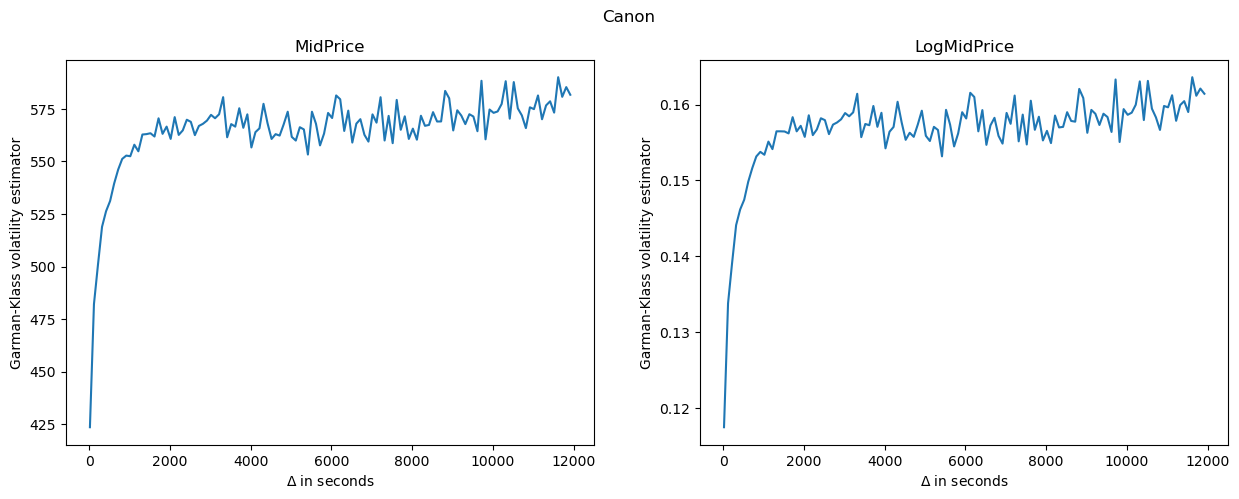

In [ ]:
GKVolatility(Tokyo["CANON"], "Canon")

**Commentary**

Compared to the previous method, this new estimator always converges when $\Delta$ goes to 0. Also the curves seem to be more regular than the previous ones as $\Delta$ goes to 0.

<font color='blue'> 2. Compute the daily volatility with $\sigma_{GK}$ and $\hat{\sigma}$ (the standard deviation of the mid-price and log-mid-price). Compare and comment the results.</font>

In [ ]:
def dailyVol(df_company, company):

    df_LVMH = df_company
    df_LVMH['MidPrice'] = (df_company['BidPrice'] + df_company['AskPrice'])/2
    df_LVMH['LogMidPrice'] = np.log(df_LVMH['MidPrice'])

    # Calculate differences and fill NaN values with the previous non-null value
    df_LVMH['DeltaMidPrice'] = df_LVMH['MidPrice'].diff().ffill()
    df_LVMH['DeltaLogMidPrice'] = df_LVMH['LogMidPrice'].diff().ffill()

    # Compute OHLC (Open-High-Low-Close) for MidPrice
    ohlc_MidPrice = df_LVMH['MidPrice'].resample('D').ohlc().dropna()
    # Calculate Garman-Klass volatility estimator for MidPrice
    VolGK_MidPrice = np.sqrt(0.5 * (ohlc_MidPrice['high'] - ohlc_MidPrice['low'])**2 - (2 * np.log(2) - 1) * (ohlc_MidPrice['close'] - ohlc_MidPrice['open'])**2)

    # Compute OHLC for LogMidPrice
    ohlc_LogMidPrice = df_LVMH['LogMidPrice'].resample('D').ohlc().dropna()
    # Calculate Garman-Klass volatility estimator for LogMidPrice
    VolGK_LogMidPrice = np.sqrt(0.5 * (ohlc_LogMidPrice['high'] - ohlc_LogMidPrice['low'])**2 - (2 * np.log(2) - 1) * (ohlc_LogMidPrice['close'] - ohlc_LogMidPrice['open'])**2)
    VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)

    # Compute standard deviation of differences for MidPrice and LogMidPrice and fill zeros with the next non-zero value
    Vol_Std_MidPrice = np.sqrt((df_LVMH['DeltaMidPrice']**2).resample('D').sum().dropna())
    Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
    Vol_Std_LogMidPrice = np.sqrt((df_LVMH['DeltaLogMidPrice']**2).resample('D').sum().dropna())
    Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Creating a figure with two subplots

    fig.suptitle(company)
    # Plot MidPrice
    axes[0].plot(VolGK_MidPrice, label='Garman-Klass volatility estimator')
    axes[0].plot(Vol_Std_MidPrice, label='Standard Volatility')
    axes[0].set_xlabel('Days')
    axes[0].set_ylabel('Volatility')
    axes[0].set_title('Daily Volatility of the mid-price')
    axes[0].legend()

    # Plot LogMidPrice
    axes[1].plot(VolGK_LogMidPrice, label='Garman-Klass volatility estimator')
    axes[1].plot(Vol_Std_LogMidPrice, label='Standard Volatility')
    axes[1].set_xlabel('Days')
    axes[1].set_ylabel('Volatility')
    axes[1].set_title('Daily Volatility of the log mid-price')
    axes[1].legend()

    plt.show()

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


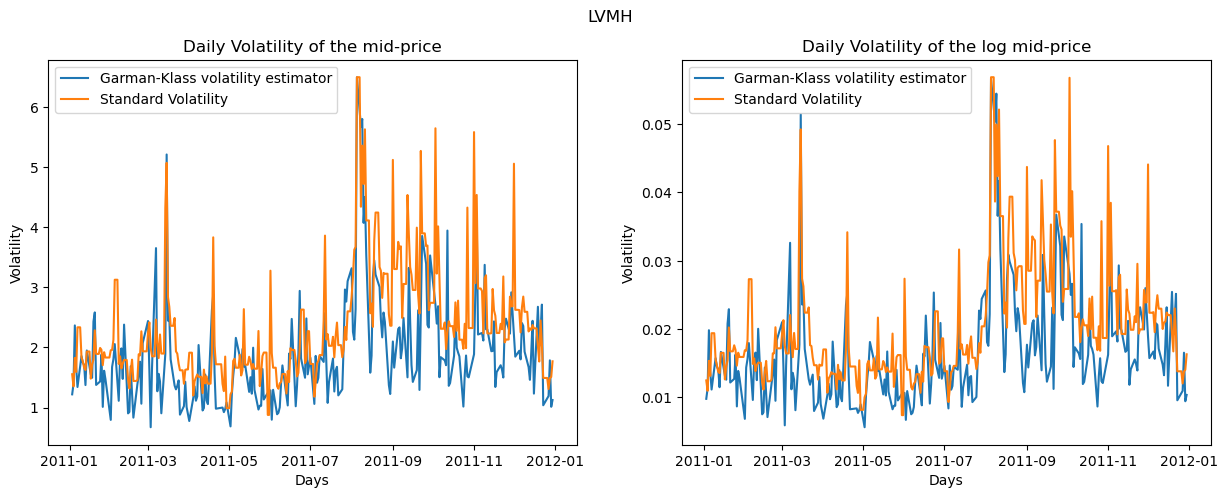

In [ ]:
dailyVol(Paris["LVMH"], "LVMH")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


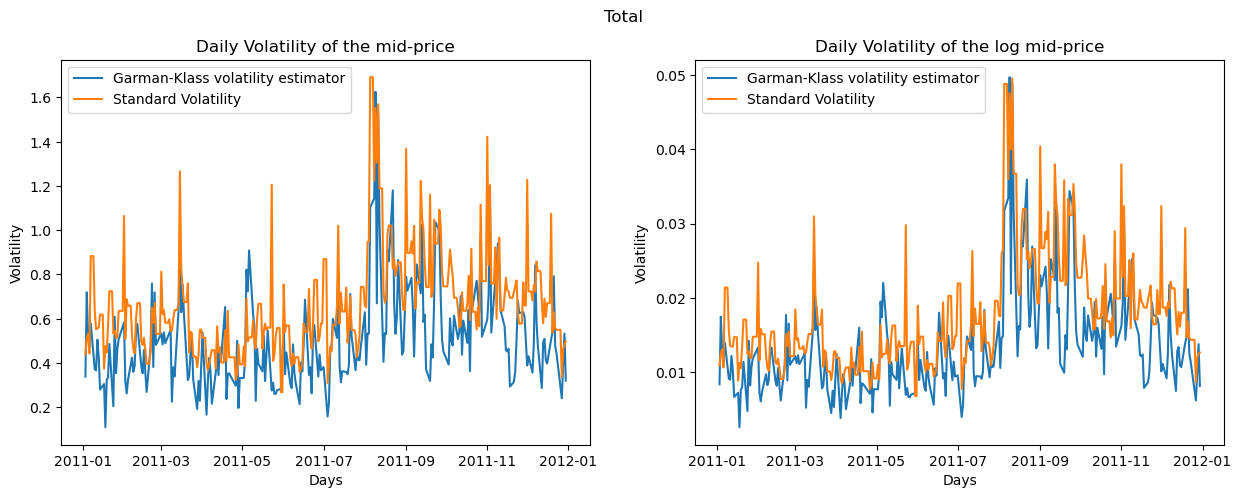

In [ ]:
dailyVol(Paris['TOTAL'], 'Total')

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


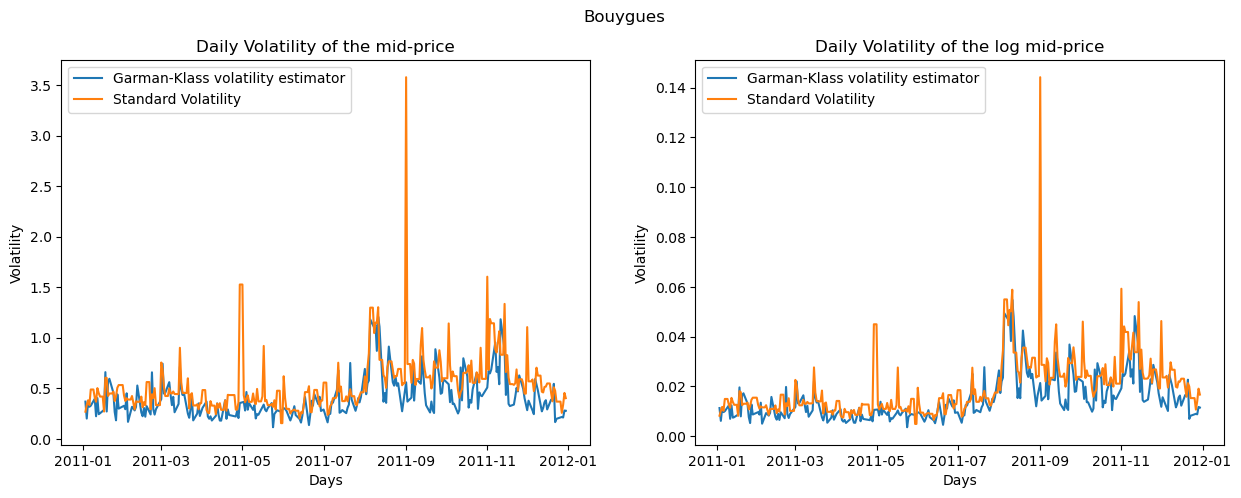

In [ ]:
dailyVol(Paris['BOUYGUES'], 'Bouygues')

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


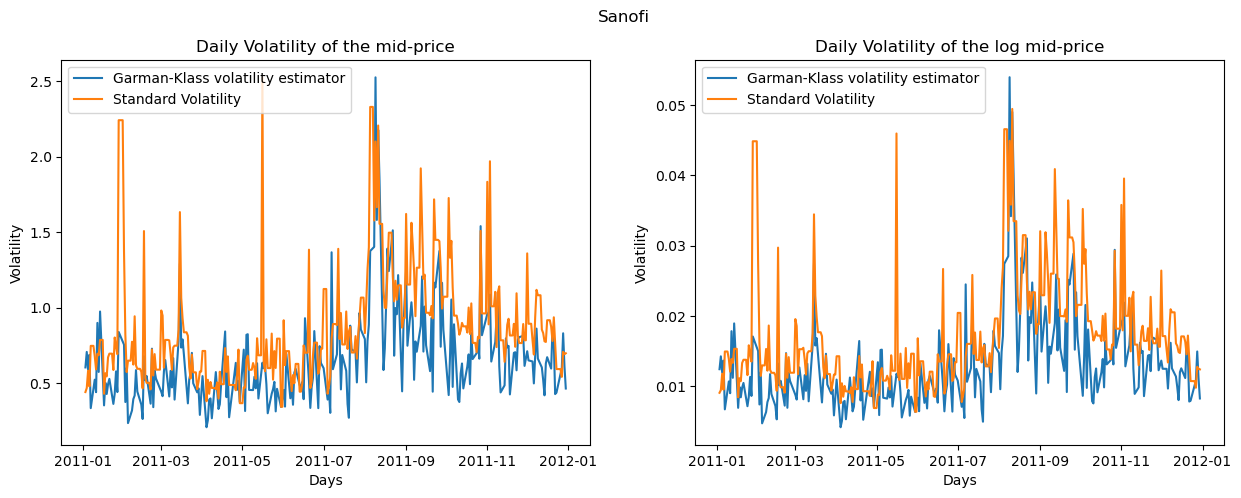

In [ ]:
dailyVol(Paris['SANOFI'], 'Sanofi')

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


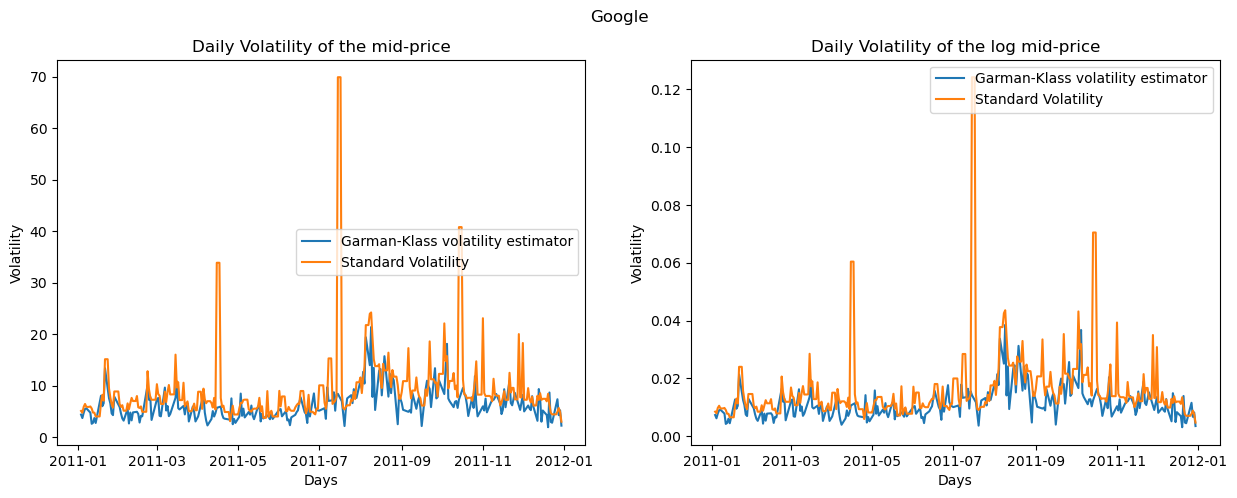

In [ ]:
dailyVol(Nasdaq['GOOGLE'], 'Google')

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


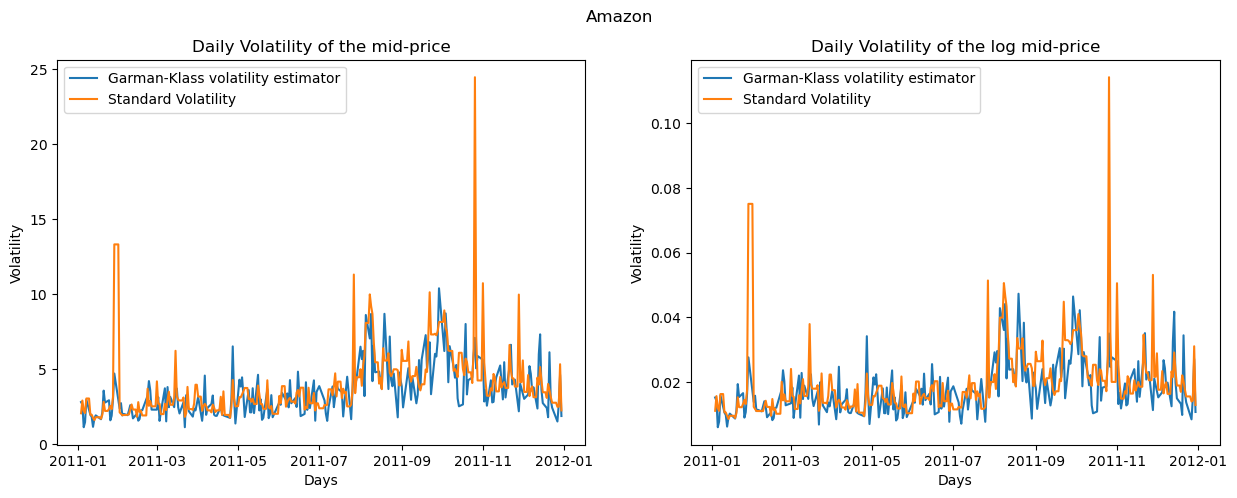

In [ ]:
dailyVol(Nasdaq['AMAZON'], "Amazon")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


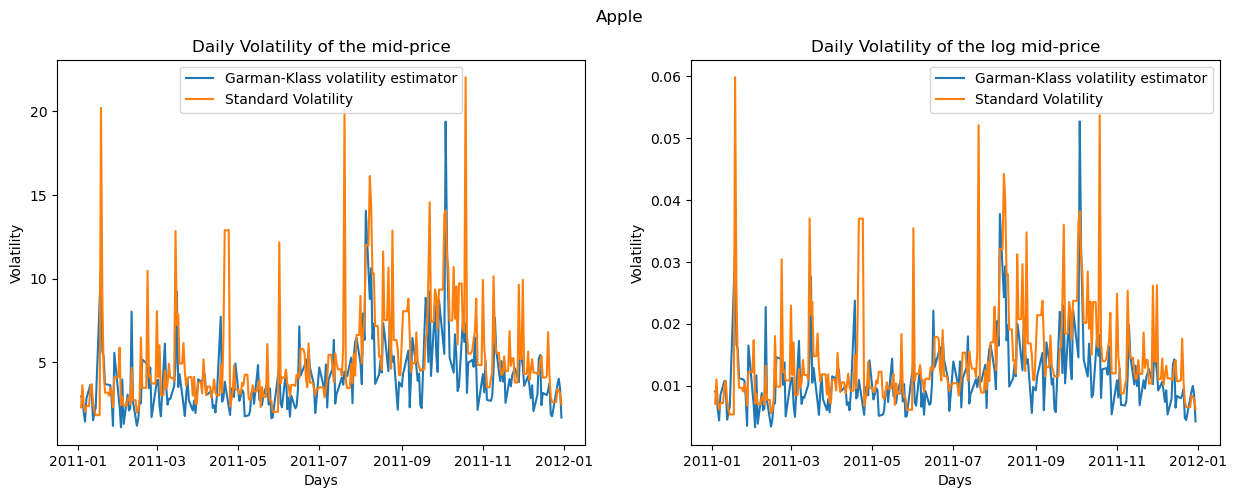

In [ ]:
dailyVol(Nasdaq['APPLE'], "Apple")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


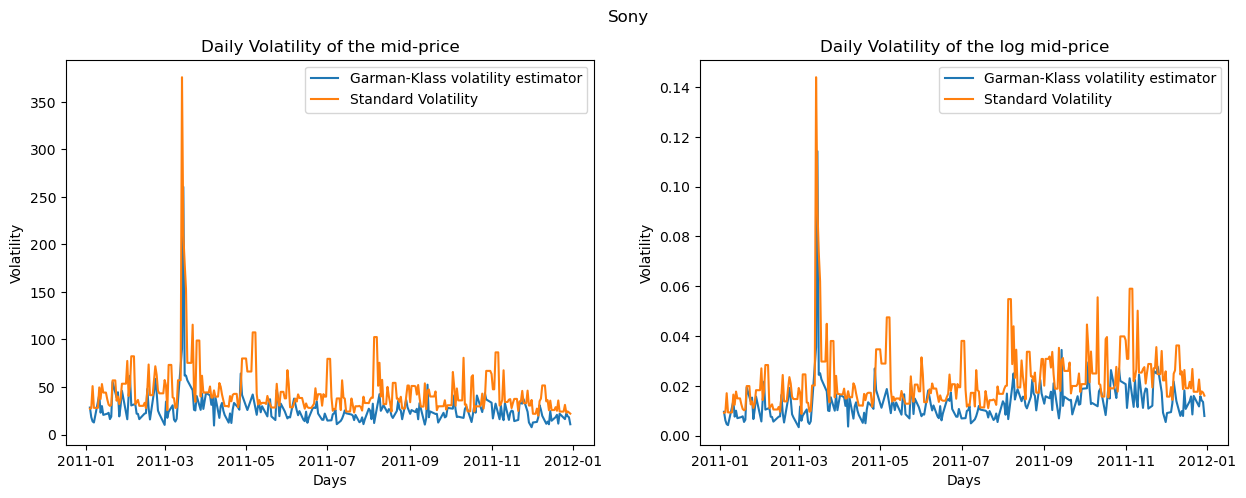

In [ ]:
dailyVol(Tokyo["SONY"], "Sony")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


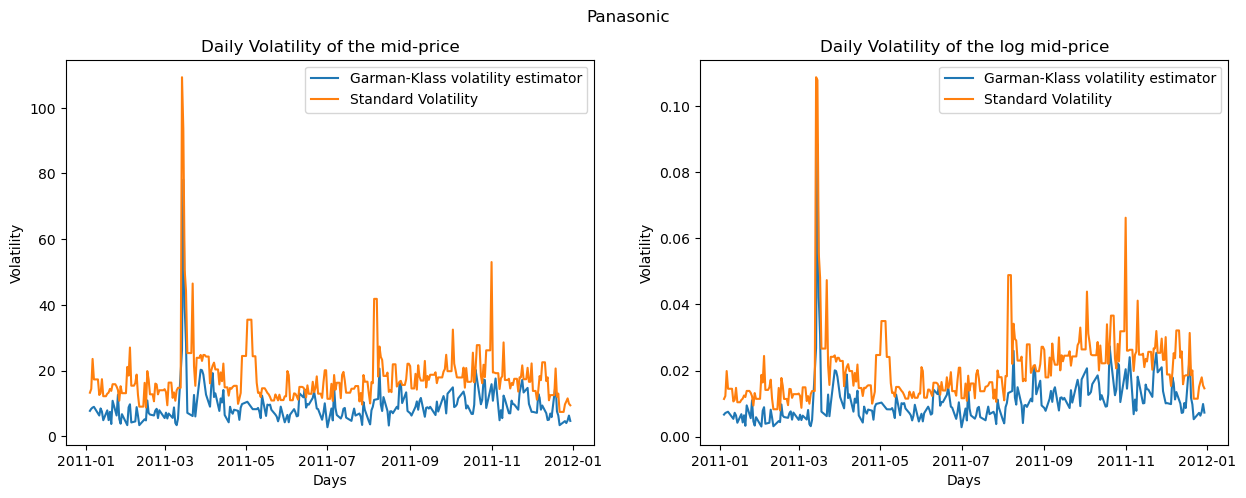

In [ ]:
dailyVol(Tokyo["PANASONIC"], "Panasonic")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:20: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  VolGK_LogMidPrice.replace(np.nan, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:24: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_MidPrice.replace(0, method='ffill', inplace=True)
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\1227100227.py:26: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  Vol_Std_LogMidPrice.replace(0, method='ffill', inplace=True)


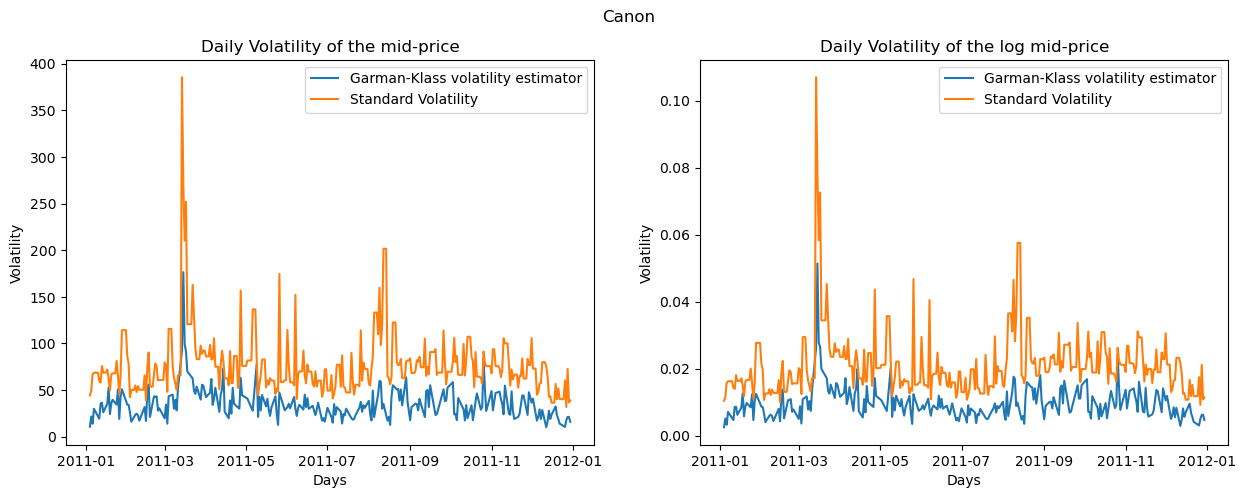

In [ ]:
dailyVol(Tokyo["CANON"], "Canon")

**Commentary**

In regards to the daily volatility of the mid price, the estimator and the standard volatility are correlated (mostly visible when there are huge spike) and are mostly at the same level, though sometimes the estimator underestimate the standard volatility.

The same can be said when we look at the daily volatility of the log mid price.

## II. Covariance Estimator and Epps Effect

### 1. "Classical" Covariance Estimator

Let $X^1= \log P^1$ and $X^2 = \log P^2$ be two log-price processes.
$$d X^1 = \mu_t^1dt+\sigma_{t-}^1dW^1_t,$$
$$d X^2 = \mu_t^2dt+\sigma_{t-}^2dW^2_t,$$
with $d\left\langle W^1,W^2\right\rangle_t=\rho_tdt$.

Set for every $j\in{1,\ldots,T/\Delta}$, $r^1_{\Delta}(j)=X^1_{\Delta j}-X^1_{\Delta(j-1)}$ and $r^2_{\Delta}(j)=X^2_{\Delta j}-X^2_{\Delta(j-1)}$ the log-price increments.

Then the integrated covariance between the two assets reads
$$\int_0^T\rho_s\sigma^1_s\sigma^2_sds=\lim_{\Delta\to0}\sum_{j=1}^{T/\Delta}r^1_{\Delta}(j)r^2_{\Delta}(j).$$
Thus, an estimator for the realized covariance may be written as
$$\hat{C}_R(\Delta)=\sum_{j=1}^{T/\Delta}r^1_{\Delta}(j)r^2_{\Delta}(j).$$
This estimator is consistent since
$$\hat{C}_R(\Delta)\overset{\mathbb{P}}{\underset{\Delta\to0}{\longrightarrow}}\int_0^T\rho_s\sigma^1_s\sigma^2_sds.$$

The problem is that we must have synchronous data, but the quotations and transactions are asynchronous.

### 2. Previous Tick Estimator

Assume now that we observe $P^1$ at times $(T^1_j)_{j\geq1}$ and $P^2$ at times $(T^2_j)_{j\geq1}$. Therefore we design
$$\bar{P}^1_t=P_{T^1_j} \quad\mbox{for }t\in[T^1_j,T^1_{j+1})$$
and
$$\bar{P}^2_t=P_{T^2_j} \quad\mbox{for }t\in[T^2_j,T^1_{j+1}).$$
Then
$$\bar{X}^1_t=\log \bar{P}^1_t \quad\mbox{and}\quad\bar{X}^2_t=\log \bar{P}^2_t/$$

For a given $\Delta$, the previous tick covariation estimator is
$$\bar{C}_R(\Delta)=\sum_{j=1}^{T/\Delta}\left(\bar{X}^1_{\Delta j}-\bar{X}^1_{\Delta (j-1)}\right)\left(\bar{X}^2_{\Delta j}-\bar{X}^2_{\Delta (j-1)}\right).$$

### 3. Epps Effect

Epps (1979): "Correlations among price changes [...] are found to decrease with the length of the interval for which the price changes are measured."
Many explanations were proposed
- systematic bias for this estimator,
- "lead-lag" effect for the assets in the same sector,
- asynchronicity of transactions,
- "tick" effect and other microstructure effects.

**Example.** Assume that $X^1$ and $X^2$ are two Brownian motions with correlation $\rho$ and the trade times are arrival times of two independent Poisson processes. Then, one can show that
$$\mathbb{E}[\bar{C}_R(\Delta)]\underset{\Delta\to0}{\longrightarrow}0.$$

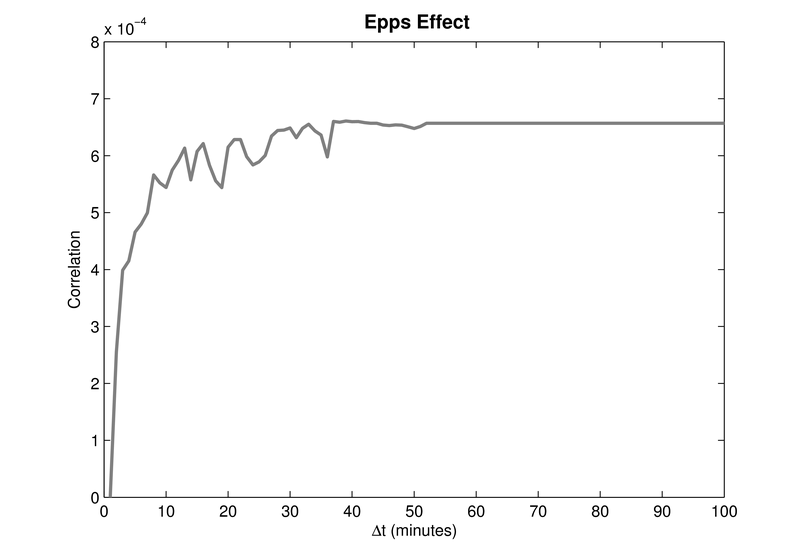

In [ ]:
Image(filename='EppsEffect.png', width=500)

_Estimator for the correlation between Total and France Telecom on Euronext Paris on the period from 23/07/2012 to 27/07/2012 as a function of time discretization step._

<font color='blue'>**To do.** Plot the correlation with respect to $\Delta$ (in minutes or seconds) for couples of asset on the same exchange (using the mid-price and the log-mid-price). Comment the results.</font>

In [ ]:
def Epps(df_company1, df_company2, company1,company2):

# Assigning data for each stock
    df_BOUYGUES, df_LVMH = df_company1, df_company2

# Calculate MidPrice and LogMidPrice for each stock
    df_BOUYGUES['MidPrice'], df_LVMH['MidPrice'] = ((
        df_BOUYGUES['BidPrice'] + df_BOUYGUES['AskPrice']) / 2, (
        df_LVMH['BidPrice'] + df_LVMH['AskPrice']) / 2)

    df_BOUYGUES['LogMidPrice'], df_LVMH['LogMidPrice'] = (
        np.log(df_BOUYGUES['MidPrice']), np.log(df_LVMH['MidPrice']))

    # Compute differences in MidPrice and LogMidPrice for each stock
    df_BOUYGUES['DiffMidPrice'], df_LVMH['DiffMidPrice'] = (
        df_BOUYGUES['MidPrice'].diff().fillna(0), df_LVMH['MidPrice'].diff().fillna(0))


    df_BOUYGUES['DiffLogMidPrice'], df_LVMH['DiffLogMidPrice'] = (
        df_BOUYGUES['LogMidPrice'].diff().fillna(0), df_LVMH['LogMidPrice'].diff().fillna(0))


    # Initialize empty lists for covariance
    Cov_MidPrice, Cov_LogMidPrice = [], []

    # Compute covariance for each stock pair
    for d in DeltaS:
        r1_MidPrice = df_LVMH['MidPrice'].resample(f'{d}s').mean().diff().dropna()
        r2_MidPrice = df_BOUYGUES['MidPrice'].resample(f'{d}s').mean().diff().dropna()
        r1_sigma = np.sqrt((r1_MidPrice**2).sum())
        r2_sigma = np.sqrt((r2_MidPrice**2).sum())
        Cov_MidPrice.append((r1_MidPrice * r2_MidPrice).sum()/(r1_sigma*r2_sigma))

        r1_LogMidPrice = df_LVMH['LogMidPrice'].resample(f'{d}s').mean().diff().dropna()
        r2_LogMidPrice = df_BOUYGUES['LogMidPrice'].resample(f'{d}s').mean().diff().dropna()
        r1_Logsigma = np.sqrt((r1_LogMidPrice**2).sum())
        r2_Logsigma = np.sqrt((r2_LogMidPrice**2).sum())
        Cov_LogMidPrice.append((r1_LogMidPrice * r2_LogMidPrice).sum()/(r1_Logsigma*r2_Logsigma))

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Creating a figure with two subplots
    fig.suptitle(f"{company1} / {company2}")

    axes[0].plot(DeltaS, Cov_MidPrice,label="Standard correlation")
    axes[0].set_xlabel('$\Delta$ in seconds')
    axes[0].set_ylabel('$C_R(\Delta)$')
    axes[0].set_title('Correlation mid-prices')

    axes[1].plot(DeltaS, Cov_LogMidPrice)
    axes[1].set_xlabel('$\Delta$ in seconds')
    axes[1].set_ylabel('$C_R(\Delta)$')
    axes[1].set_title('Correlation log mid-prices')

    plt.show()

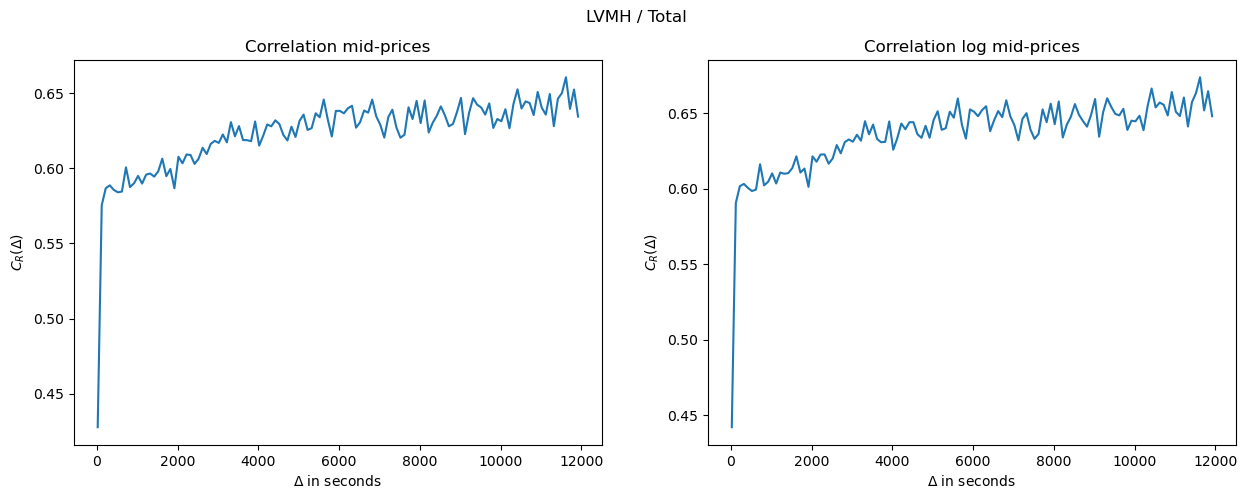

In [ ]:
Epps(Paris["LVMH"],Paris["TOTAL"],"LVMH","Total")

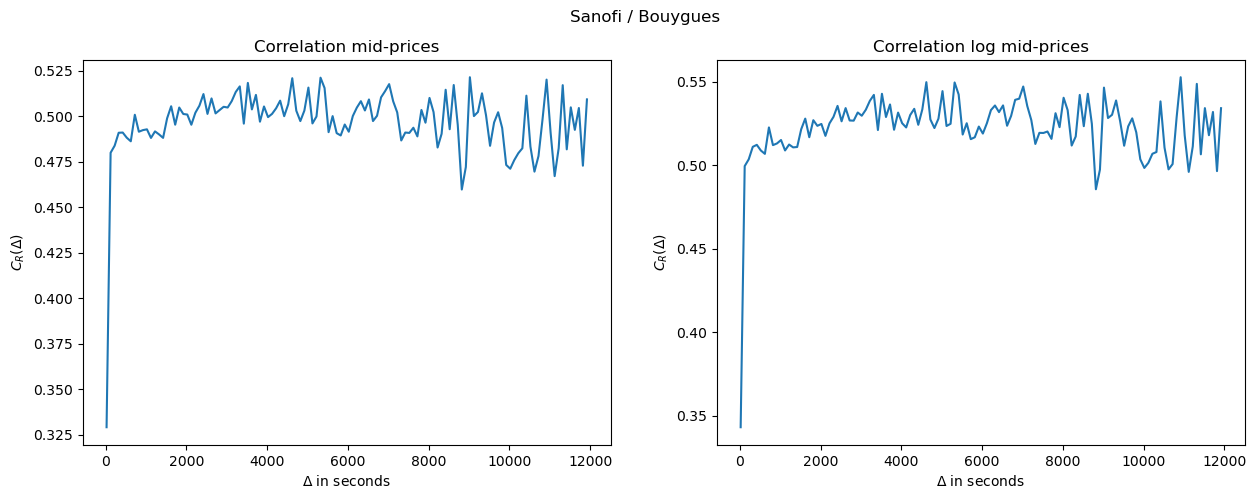

In [ ]:
Epps(Paris["SANOFI"],Paris["BOUYGUES"],"Sanofi","Bouygues")

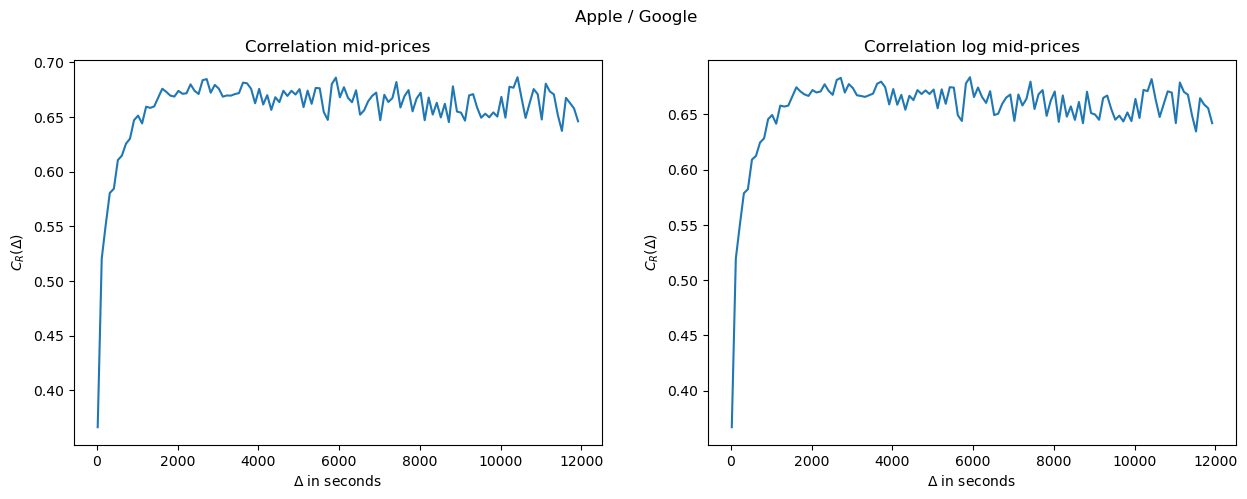

In [ ]:
Epps(Nasdaq["APPLE"],Nasdaq["GOOGLE"],"Apple","Google")

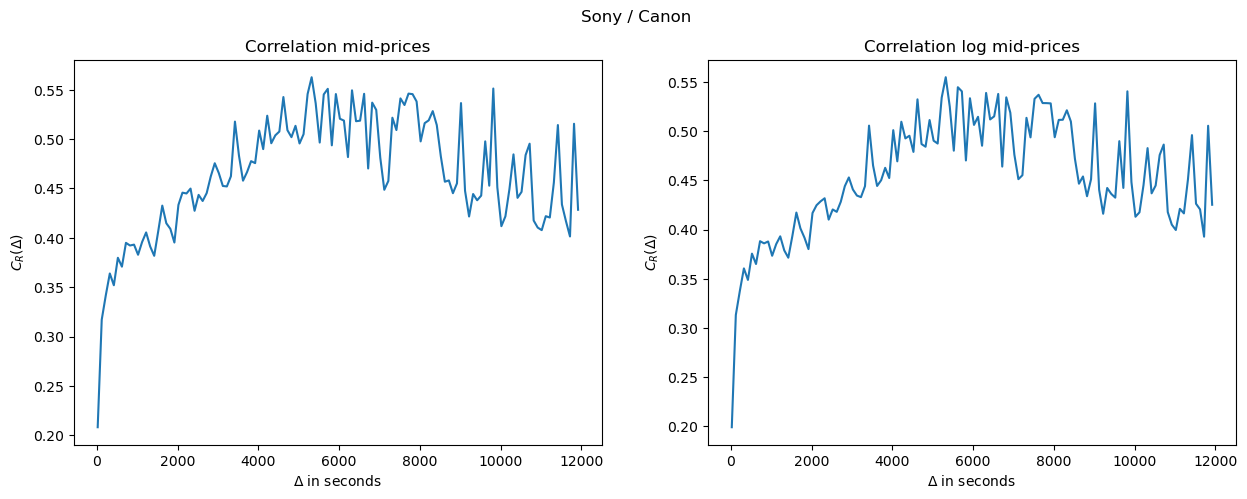

In [ ]:
Epps(Tokyo["SONY"],Tokyo["CANON"],"Sony","Canon")

**Commentary**

When $\Delta$ goes to 0, the correlation plunge towards 0. We can also see that the estimator is really similar wether we use the mid price or the log mid price, which is natural as the correlation is without dimension.


The correlation estimator for high-frequency data is studied in many publications, for example Hayashi & Yoshida or Zhang.

### 4. Hayashi-Yoshida Estimator

Let $I^1_i=(T^1_i,T^1_{i+1}]$, $i\geq1$, and $I^2_j=(T^2_j,T^2_{j+1}]$, $j\geq1$.

The cumulative covariance estimator of Hayashi-Yoshida reads
$$U_n=\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}.$$

That is, the product of any pair of increments $\Delta P^1(I^1_i)$ and $\Delta P^2(I^2_j)$ will make a contribution to the summation only when the respective observation intervals $I^1_i$ and $I^2_i$ are overlapping.

This estimator does not need any selection of $\Delta$ and is convergent if the arrival times are independent from the price.

Then, they define two associated correlation estimators
- if $\sigma_1$ and $\sigma_2$ are known,
$$R^1_n=\frac1T\frac{\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}}{\sigma_1\sigma_2},$$
- if $\sigma_1$ and $\sigma_2$ are known/unknown,
$$R^2_n=\frac{\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}}{\sqrt{\sum_i\Delta P^1(I^1_i)^2}\sqrt{\sum_j\Delta P^2(I^2_j)^2}}.$$
Under the same conditions as for $U_n$, $R^1$ and $R^2$ are consistent for $\rho$ as $n\to\infty$.

**Remark.** This estimator is nevertheless not robust to microstructure effects.

<font color='blue'>**To do.** Compute the daily Hayashi-Yoshida estimator for couples of assets on the same exchange and compare it to classical estimator. Do it for one month you choose and plot the results. Comment. </font>

In [ ]:
def Hayashi_Yoshida(df_company1, df_company2, company1, company2):


    df_LVMH_day = df_company1[datetime(2011, 2,1):datetime(2011, 2,28)]   # We only use the data from February
    df_TOTAL_day = df_company2[datetime(2011, 2,1):datetime(2011, 2,28)]

    df_LVMH_day['MidPrice'], df_TOTAL_day['MidPrice'] = ((
        df_LVMH_day['BidPrice'] + df_LVMH_day['AskPrice']) / 2, (
        df_TOTAL_day['BidPrice'] + df_TOTAL_day['AskPrice']) / 2)


    df_LVMH_day['DiffMidPrice'], df_TOTAL_day['DiffMidPrice'] = (
        df_LVMH_day['MidPrice'].diff().fillna(0), df_TOTAL_day['MidPrice'].diff().fillna(0))

    Cor_MidPriceHY = []

    for d in DeltaS:

        r1_MidPrice = df_LVMH_day['MidPrice'].resample(f'{d}s').mean().dropna()
        r2_MidPrice = df_TOTAL_day['MidPrice'].resample(f'{d}s').mean().dropna()

        r1_DiffMidPrice = df_LVMH_day['MidPrice'].resample(f'{d}s').mean().diff().fillna(0)
        r2_DiffMidPrice = df_TOTAL_day['MidPrice'].resample(f'{d}s').mean().diff().fillna(0)

        sigma_LVMH = np.sqrt((r1_DiffMidPrice**2).sum())
        sigma_TOTAL = np.sqrt((r2_DiffMidPrice**2).sum())


        mid_price_LVMH = r1_MidPrice[r1_DiffMidPrice != 0]
        mid_price_TOTAL = r2_MidPrice[r2_DiffMidPrice != 0]

        serie_LVMH = pd.DataFrame(np.array(mid_price_LVMH.diff().dropna()), columns=['DiffMidPrice'])
        serie_LVMH['Beginning'] = mid_price_LVMH.index[:-1]
        serie_LVMH['End'] = mid_price_LVMH.index[1:]
        serie_TOTAL = pd.DataFrame(np.array(mid_price_TOTAL.diff().dropna()), columns=['DiffMidPrice'])
        serie_TOTAL['Beginning'] = mid_price_TOTAL.index[:-1]
        serie_TOTAL['End'] = mid_price_TOTAL.index[1:]

        Covariance = 0
        for i in range(len(serie_LVMH.index)):
            Beginning_LVMH = serie_LVMH['Beginning'].iloc[i]
            End_LVMH = serie_LVMH['End'].iloc[i]
            Covariance += serie_LVMH['DiffMidPrice'].iloc[i] * np.sum(serie_TOTAL['DiffMidPrice'].loc[(serie_TOTAL['Beginning'] < End_LVMH) & (serie_TOTAL['End'] >= Beginning_LVMH)])

        Cor_MidPriceHY.append(Covariance / (sigma_LVMH * sigma_TOTAL))

    # Plotting
    plt.plot(DeltaS, Cor_MidPriceHY)
    plt.xlabel('$\Delta$ in seconds')
    plt.ylabel('$C_R(\Delta)$')
    plt.title(f'Hayashi Yoshida correlation {company1}/{company2}')

    plt.show()


C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['MidPrice'], df_TOTAL_day['MidPrice'] = ((
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['DiffMidPrice'], df_TOTAL_day['DiffMidPrice'] = (


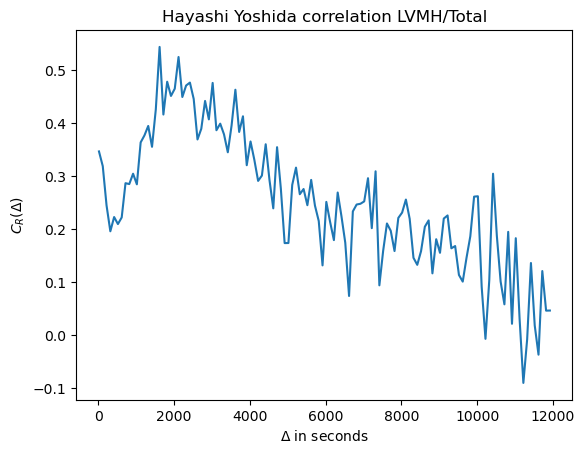

In [ ]:
Hayashi_Yoshida(Paris["LVMH"],Paris["TOTAL"],"LVMH","Total")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['MidPrice'], df_TOTAL_day['MidPrice'] = ((
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['DiffMidPrice'], df_TOTAL_day['DiffMidPrice'] = (


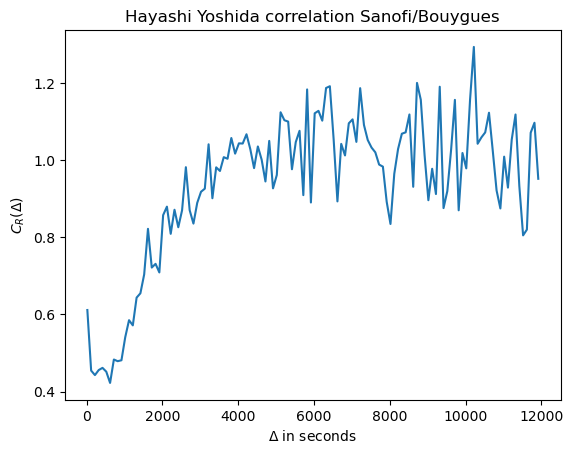

In [ ]:
Hayashi_Yoshida(Paris["SANOFI"],Paris["BOUYGUES"],"Sanofi","Bouygues")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['MidPrice'], df_TOTAL_day['MidPrice'] = ((
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['DiffMidPrice'], df_TOTAL_day['DiffMidPrice'] = (


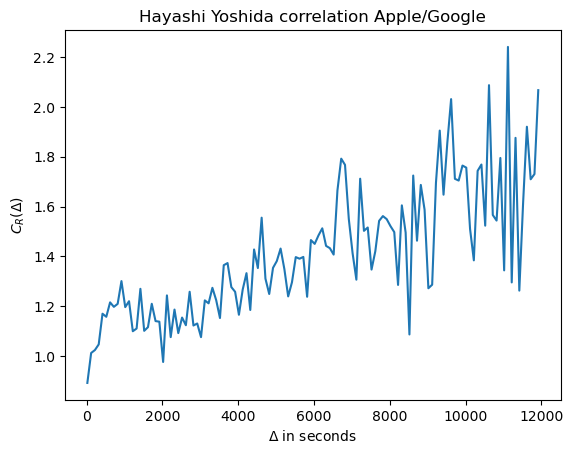

In [ ]:
Hayashi_Yoshida(Nasdaq["APPLE"],Nasdaq["GOOGLE"],"Apple","Google")

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['MidPrice'], df_TOTAL_day['MidPrice'] = ((
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3569884275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LVMH_day['DiffMidPrice'], df_TOTAL_day['DiffMidPrice'] = (


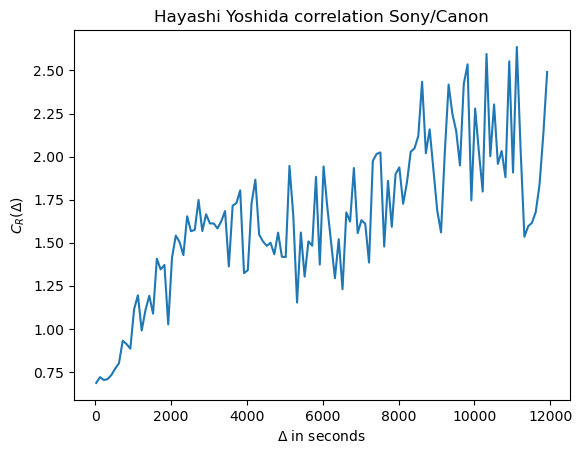

In [ ]:
Hayashi_Yoshida(Tokyo["SONY"],Tokyo["CANON"],"Sony","Canon")

The Hayashi Yoshida estimator converges to a non zero value unlike the standard estimator for the correlation. We can also see that this estimator, can for larger values of $\Delta$ can take values higher than 1. This is howerver is not an issue as long as the value for $\Delta$ going to 0 is beetween 1 and -1.

## III. Link between bid-ask spread and volatility per trade for large tick assets

Dayri and Rosenbaum developed a new approach to exhibit the relationship between bid-ask spread and volatility per trade for large tick assets. The model derives from the one with uncertainty zones. They assume the existence of a {\em latent price} representing the opinion of market participants on the ``true'' price and modeled by a continuous Brownian semi-martingale $(x_t)_{t\geq0}$. Let $\alpha$ be the tick size of the asset. The areas of uncertainty are defined as bands around the middle of the tick size with width $2\eta\alpha$, $0<\eta<1$. The dynamics of the price of the last transaction $p_t$ is obtained as a function of the latent price and areas of uncertainty. The bid-ask spread is assumed to be constant and equal to the tick size $\alpha$.

The authors define alternating (resp. continuity) of a tick size as a jump in the price of a tick size whose direction is adverse (resp. the same) than the previous jump. The number of alternations and continuities of a tick size are denoted by $N_{\alpha,t}^{(a)}$ and $N_{\alpha,t}^{(c)}$ respectively on the period $[0,t]$. The consistent estimator of $\eta$ on $[0,t]$ is then
$$\widehat{\eta}_{\alpha,t}=\frac{N_{\alpha,t}^{(c)}}{2N_{\alpha,t}^{(a)}}.$$
For volatility, first note that this model allows to find the value of the latent price on the date of $\tau_i$ of the $i^{th}$ price change by the simple relationship
$$x_{\tau_i}=p_{\tau_i}-\mbox{sign}\left(p_{\tau_i}-p_{\tau_{i-1}}\right)\left(\frac12-\eta\right)\alpha.$$
As we can estimate $\eta$, we can then find out $x_{\tau_i}$ from $p_{\tau_{i-1}}$ and $p_{\tau_i}$. For example, the realized variance on estimated values of the efficient price on $[0,t]$
$$\widehat{\sigma^2_{LP,t}}=\sum_{\tau_i\leq t}\left(\widehat{x}_{\tau_i}-\widehat{x}_{\tau_{i-1}}\right)^2,$$
where $\widehat{x}_{\tau_i}=p_{\tau_i}-\mbox{sign}\left(p_{\tau_i}-p_{\tau_{i-1}}\right)\left(\frac12-\widehat{\eta}_{\alpha,t}\right)\alpha$, is an estimator of the integrated variance of the latent price over $[0,t]$ $\int_0^t\sigma_s^2ds$. Now we set $\widehat{\sigma}_{LP}=\sqrt{\widehat{\sigma^2_{[0,t]}}}$ and we define the volatility per trade by $\widehat{\sigma}_{LP}/\sqrt{N}$ where $N:=N_{[0,t]}$ denotes the total number of trades on $[0,t]$. Without making any differences between parameters and their estimates, we get then the following relationship

$\eta\alpha\approx c\frac{\sigma_{LP}}{\sqrt{N}}.$

Market participants have a certain resolution, or precision at which they infer the efficient price $x_t$. $\eta$ quantifies this resolution: when $\eta$ is close to 1/2, the resolution is close to the tick value. The quantity $2\eta\alpha$ can be seen as an implicit spread: $\eta$ can indeed be viewed as a suitable measure for the tick size.


<font color='blue'>**To do.** 1. Compute $\eta$, $\alpha$ and $\sigma_{LP}$ on a daily basis for each asset. Compare the implicit spread and the real spread. Idem for the volatilities of both latent price and traded price. Comment.</font>

In [ ]:
df_LVMH = Paris['LVMH']
df_TOTAL = Paris['TOTAL']

# Compute differences in traded prices for LVMH and TOTAL
diff_price_LVMH = df_LVMH['TradedPrice'].diff()
diff_price_TOTAL = df_TOTAL['TradedPrice'].diff()

# Compute absolute differences and resample by day, then find the minimum tick size for each day
alpha_LVMH = np.abs(diff_price_LVMH[diff_price_LVMH != 0]).resample('D').min().dropna()
alpha_TOTAL = np.abs(diff_price_TOTAL[diff_price_TOTAL != 0]).resample('D').min().dropna()

# Print average tick sizes for LVMH and TOTAL
print('Average Tick size LVMH:', alpha_LVMH.mean())
print('Average Tick size Total:', alpha_TOTAL.mean())

Average Tick size LVMH: 0.049193548387093174
Average Tick size Total: 0.004999999999995496


In [ ]:
dates1 = np.unique(df_LVMH.index.date)
eta1 = []
for d in dates1:
  returns = df_LVMH['TradedPrice'][df_LVMH.index.date==d].diff().dropna()
  returns = np.array(returns[returns!=0])
  Nc = np.sum(returns[1:]*returns[:-1]>0)
  Na = np.sum(returns[1:]*returns[:-1]<0)
  eta1.append(Nc/(2*Na))

dates3 = np.unique(df_TOTAL.index.date)
eta2 = []
for d in dates3:
  returns = df_TOTAL['TradedPrice'][df_TOTAL.index.date==d].diff().dropna()
  returns = np.array(returns[returns!=0])
  Nc = np.sum(returns[1:]*returns[:-1]>0)
  Na = np.sum(returns[1:]*returns[:-1]<0)
  eta2.append(Nc/(2*Na))

print('Average eta LVMH', np.mean(eta1))
print('Average eta Total', np.mean(eta2))

Average eta LVMH 0.36884854073748957
Average eta Total 0.5208761519324173


The eta of Total is near 0.5 so it is a small tick asset unlike LVMH which is smaller than 0.5 and is considered a large tick.

<font color='blue'> 2. Implement the linear regression for large tick asset and compare to the results of the previous practical work.</font>

In [ ]:
vol_lp1, nb_trades1 = [], []
for d in range(len(dates1)):
  df = df_LVMH[df_LVMH.index.date==dates1[d]]
  nb_trades1.append(len(df['TradedPrice']))
  latent_price = df['TradedPrice'][1:] - np.sign(df['TradedPrice'].diff().dropna())*(0.5-eta1[d])
  vol_lp1.append(np.sqrt(np.sum(np.diff(latent_price)**2)))

vol_lp2, nb_trades2 = [], []
for d in range(len(dates1)):
  df = df_TOTAL[df_TOTAL.index.date==dates3[d]]
  nb_trades2.append(len(df['TradedPrice']))
  latent_price = df['TradedPrice'][1:] - np.sign(df['TradedPrice'].diff().dropna())*(0.5-eta2[d])
  vol_lp2.append(np.sqrt(np.sum(np.diff(latent_price)**2)))

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3984604352.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].plot(S1['TradedPrice'], model1.params.const+model1.params[1]*S1['TradedPrice'])
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\3984604352.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].plot(S2['TradedPrice'], model2.params.const+model2.params[1]*S2['TradedPrice'])


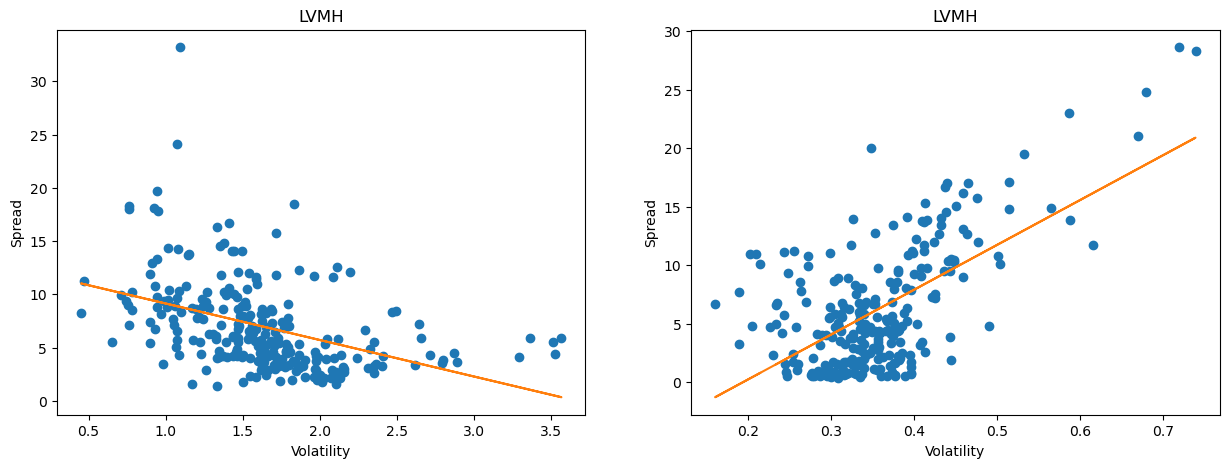

In [ ]:
import statsmodels.api as sm
spread1 = eta1*alpha_LVMH*np.sqrt(nb_trades1)
spread2 = eta2*alpha_TOTAL*np.sqrt(nb_trades2)
S1 = sm.add_constant(spread1)
S2 = sm.add_constant(spread2)

model1 = sm.OLS(vol_lp1, S1).fit()
model2 = sm.OLS(vol_lp2, S2).fit()

fig, axes = plt.subplots(1,2, figsize=(15,5))  # Creating a figure with two subplots
axes[0].plot(S1['TradedPrice'], vol_lp1, 'o')
axes[0].plot(S1['TradedPrice'], model1.params.const+model1.params[1]*S1['TradedPrice'])
axes[0].set_xlabel('Volatility')
axes[0].set_ylabel('Spread')
axes[0].set_title('LVMH')

axes[1].plot(S2['TradedPrice'], vol_lp2, 'o')
axes[1].plot(S2['TradedPrice'], model2.params.const+model2.params[1]*S2['TradedPrice'])
axes[1].set_xlabel('Volatility')
axes[1].set_ylabel('Spread')
axes[1].set_title('Total')
plt.show()

**Commentary for LVMH**

In [ ]:
print(model1.summary())

The provided OLS regression results offer insights into the relationship between the dependent variable (y, likely representing volatility) and the independent variable (TradedPrice, potentially representing spread or another market-related metric). Let's analyze these results:

R-squared (R²) and Adjusted R-squared:

The R-squared value is 0.178, indicating that approximately 17.8% of the variability in the dependent variable (y) is explained by the independent variable (TradedPrice).
The adjusted R-squared, which accounts for the number of predictors in the model, is slightly lower at 0.174.
F-statistic and Prob (F-statistic):

The F-statistic is 53.18, suggesting that the overall regression model is statistically significant.
The associated probability (Prob (F-statistic)) is very low (4.15e-12), indicating that the probability of observing such an F-statistic under the null hypothesis (no relationship between the variables) is extremely small.
Coefficients:

The coefficient for the constant term (const) is 12.5574, indicating the value of the dependent variable when the independent variable is zero.
The coefficient for the TradedPrice variable is -3.4243, suggesting that for each unit increase in TradedPrice, the dependent variable (y) decreases by approximately 3.4243 units.
Both coefficients are statistically significant, as indicated by the p-values (P>|t|) being very close to zero.
Standard Errors and t-statistics:

The standard errors (std err) associated with the coefficients measure the variability of the coefficient estimates. Smaller standard errors indicate more precise estimates.
The t-statistics (coef / std err) measure the significance of each coefficient. Larger absolute t-values suggest greater significance.
Both coefficients have relatively large t-values, indicating their significance in explaining the variability in the dependent variable.
Additional Information:

The model includes 248 observations (No. Observations) and one predictor variable (TradedPrice).
Other statistical metrics such as the Log-Likelihood, AIC (Akaike Information Criterion), and BIC (Bayesian Information Criterion) provide information about model fit and complexity.
In summary, these results suggest that there is a statistically significant relationship between the TradedPrice variable and the dependent variable (y), with TradedPrice being a significant predictor of volatility or another market-related metric. However, the relatively low R-squared value indicates that other factors not included in the model may also influence the dependent variable.

**Commentary for Total**

In [ ]:
print(model2.summary())

Let's analyze the provided OLS regression results:

R-squared (R²) and Adjusted R-squared:

The R-squared value is 0.378, indicating that approximately 37.8% of the variability in the dependent variable (y) is explained by the independent variable (TradedPrice).
The adjusted R-squared, accounting for the number of predictors in the model, is 0.376.
F-statistic and Prob (F-statistic):

The F-statistic is 149.8, suggesting that the overall regression model is highly statistically significant.
The associated probability (Prob (F-statistic)) is very low (3.25e-27), indicating that the probability of observing such an F-statistic under the null hypothesis (no relationship between the variables) is extremely small.
Coefficients:

The coefficient for the constant term (const) is -7.4135, indicating the value of the dependent variable when the independent variable is zero.
The coefficient for the TradedPrice variable is 38.3365, suggesting that for each unit increase in TradedPrice, the dependent variable (y) increases by approximately 38.3365 units.
Both coefficients are statistically significant, with p-values close to zero.
Standard Errors and t-statistics:

The standard errors (std err) associated with the coefficients measure the variability of the coefficient estimates.
The t-statistics (coef / std err) measure the significance of each coefficient. Larger absolute t-values suggest greater significance.
Both coefficients have relatively large t-values, indicating their significance in explaining the variability in the dependent variable.
Additional Information:

The model includes 248 observations (No. Observations) and one predictor variable (TradedPrice).
The Log-Likelihood, AIC (Akaike Information Criterion), and BIC (Bayesian Information Criterion) provide information about model fit and complexity.
The Omnibus and Jarque-Bera tests provide information about the normality of residuals.
In summary, these results indicate a strong and statistically significant relationship between the TradedPrice variable and the dependent variable (y). The model explains a significant portion of the variability in the dependent variable, as evidenced by the high R-squared value and low p-values for the coefficients. The findings suggest that changes in TradedPrice have a substantial impact on the dependent variable, with higher TradedPrice values associated with higher values of the dependent variable.

C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\719750201.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(model2.params[1]*S2['TradedPrice']+model2.params[2]*S2['TradedPrice'], vol_lp2, 'o')
C:\Users\julpl\AppData\Local\Temp\ipykernel_10992\719750201.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(model2.params[1]*S2['TradedPrice']+model2.params[2]*S2['TradedPrice'], model2.params.const+model2.params[1]*S2['TradedPrice'])


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

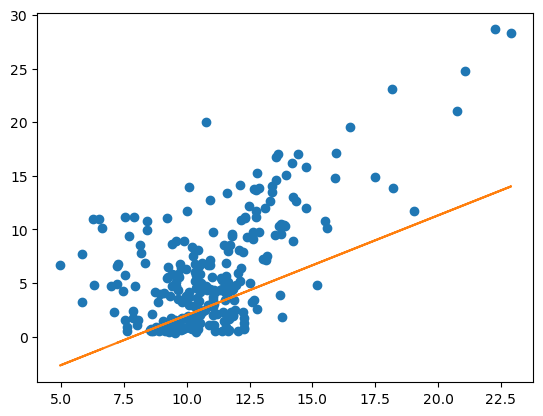

In [ ]:

df_TOTAL['Spread'] = df_TOTAL['AskPrice'] - df_TOTAL['BidPrice']

s2 = df_TOTAL['Spread'].resample('D').mean().dropna()*np.sqrt(nb_trades2)

S2 = sm.add_constant(pd.concat([spread2,s2],axis=1))


model2 = sm.OLS(vol_lp2, S2).fit()

plt.plot(model2.params[1]*S2['TradedPrice']+model2.params[2]*S2['TradedPrice'], vol_lp2, 'o')
plt.plot(model2.params[1]*S2['TradedPrice']+model2.params[2]*S2['TradedPrice'], model2.params.const+model2.params[1]*S2['TradedPrice'])
plt.xlabel('Volatility')
plt.ylabel('Spread')
plt.title('Total')
plt.show()

**Commentary**

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     79.68
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.21e-27
Time:                        00:35:06   Log-Likelihood:                -700.28
No. Observations:                 248   AIC:                             1407.
Df Residuals:                     245   BIC:                             1417.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.2983      1.139     -6.408      

R-squared (R²) and Adjusted R-squared:

R-squared: 0.394
Adjusted R-squared: 0.389
These values indicate that approximately 39.4% of the variability in the dependent variable (y) is explained by the independent variables (TradedPrice and Spread), adjusted for the number of predictors.
F-statistic and Prob (F-statistic):

F-statistic: 79.68
Prob (F-statistic): 2.21e-27
The F-statistic tests the overall significance of the regression model. Here, the F-statistic is significant, with a very low probability of observing such a result under the null hypothesis (no relationship between the variables).
Coefficients:

Constant (const): -7.2983
TradedPrice: 28.8423
Spread: 2.1479
These coefficients represent the estimated effects of TradedPrice and Spread on the dependent variable (y). The constant term indicates the value of y when both independent variables are zero.
Standard Errors and t-statistics:

Standard errors (std err) measure the variability of the coefficient estimates.
t-statistics (coef / std err) measure the significance of each coefficient. Larger absolute t-values indicate greater significance.
Both TradedPrice and Spread have statistically significant coefficients, as indicated by their low p-values (P>|t|).
Interpretation of Coefficients:

The coefficient for TradedPrice (28.8423) suggests that, holding Spread constant, a one-unit increase in TradedPrice is associated with an increase in y by approximately 28.8423 units.
The coefficient for Spread (2.1479) suggests that, holding TradedPrice constant, a one-unit increase in Spread is associated with an increase in y by approximately 2.1479 units.
Additional Information:

The model includes 248 observations and two predictor variables (TradedPrice and Spread).
The Omnibus and Jarque-Bera tests provide information about the normality of residuals, indicating whether the assumptions of the regression model are met.
Overall, these results suggest that both TradedPrice and Spread are significant predictors of the dependent variable (y), with TradedPrice having a stronger effect. The model explains a substantial portion of the variability in y, and the inclusion of Spread improves the model's explanatory power compared to using TradedPrice alone.